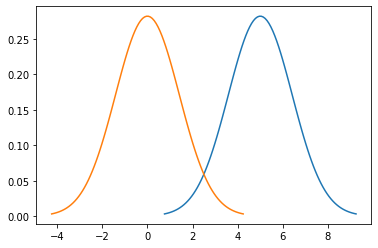

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
mu_w1 = 5
variance_w1 = 2
sigma_w1 = np.sqrt(variance_w1)
x_w1 = np.linspace(mu_w1 - 3*sigma_w1, mu_w1 + 3*sigma_w1, 100)
plt.plot(x_w1, stats.norm.pdf(x_w1, mu_w1, sigma_w1))

mu_w2 = 0
variance_w2 = 2
sigma_w2 = np.sqrt(variance_w2)
x_w2 = np.linspace(mu_w2 - 3*sigma_w2, mu_w2 + 3*sigma_w2, 100)
plt.plot(x_w2, stats.norm.pdf(x_w2, mu_w2, sigma_w2))
plt.show()

In [2]:
all = pd.read_csv('https://raw.githubusercontent.com/ekapolc/pattern_2022/main/HW/HW02/hr-employee-attrition-with-null.csv')

In [3]:
all.describe()

,Unnamed: 0,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1176.000000,1176.000000,1176.00000,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000
mean,734.500000,37.134354,798.875850,9.37500,2.920918,1.0,1031.399660,2.733844,65.821429,2.728741,2.072279,2.749150,6481.232143,14220.915816,2.731293,15.214286,3.150510,2.694728,80.0,0.752551,11.295068,2.787415,2.770408,7.067177,4.290816,2.159014,4.096939
std,424.496761,9.190317,406.957684,8.23049,1.028796,0.0,601.188955,1.092992,20.317323,0.705280,1.105828,1.102029,4695.122876,7109.800717,2.513468,3.657926,0.357723,1.093660,0.0,0.822550,7.783376,1.290507,0.705004,6.127836,3.630901,3.163524,3.537393
min,0.000000,18.000000,102.000000,1.00000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,367.250000,30.000000,457.750000,2.00000,2.000000,1.0,494.750000,2.000000,48.000000,2.000000,1.000000,2.000000,2895.000000,7941.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,734.500000,36.000000,798.500000,7.00000,3.000000,1.0,1027.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4877.500000,14054.000000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1101.750000,43.000000,1168.250000,15.00000,4.000000,1.0,1562.250000,4.000000,84.000000,3.000000,3.000000,4.000000,8327.250000,20364.000000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,2.250000,7.000000
max,1469.000000,60.000000,1499.000000,29.00000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19859.000000,26997.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [4]:
all.head()

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41.0,Yes,Travel_Rarely,NaN,NaN,1.0,NaN,Life Sciences,1.0,1.0,2.0,Female,94.0,3.0,2.0,NaN,4.0,Single,NaN,19479.0,8.0,Y,Yes,11.0,NaN,1.0,80.0,0.0,8.0,0.0,NaN,6.0,NaN,0.0,NaN
1,1,NaN,No,NaN,279.0,Research & Development,NaN,NaN,Life Sciences,1.0,2.0,3.0,Male,61.0,2.0,2.0,Research Scientist,2.0,Married,NaN,24907.0,1.0,Y,NaN,23.0,NaN,4.0,NaN,1.0,10.0,NaN,3.0,10.0,NaN,NaN,7.0
2,2,37.0,Yes,NaN,1373.0,NaN,2.0,2.0,NaN,1.0,4.0,NaN,Male,92.0,2.0,1.0,Laboratory Technician,3.0,Single,NaN,2396.0,6.0,Y,Yes,15.0,3.0,NaN,80.0,0.0,7.0,3.0,NaN,NaN,0.0,NaN,0.0
3,3,NaN,No,Travel_Frequently,1392.0,Research & Development,3.0,4.0,Life Sciences,NaN,NaN,NaN,Female,56.0,3.0,1.0,Research Scientist,3.0,NaN,2909.0,23159.0,1.0,Y,Yes,11.0,3.0,3.0,NaN,NaN,8.0,3.0,NaN,8.0,NaN,3.0,0.0
4,4,27.0,No,Travel_Rarely,591.0,Research & Development,2.0,1.0,Medical,1.0,7.0,1.0,Male,40.0,NaN,1.0,NaN,2.0,NaN,3468.0,16632.0,NaN,Y,No,NaN,3.0,4.0,80.0,1.0,6.0,NaN,3.0,2.0,2.0,2.0,NaN


In [5]:
all.loc[all["Attrition"] == "No", "Attrition"] = 0.0
all.loc[all["Attrition"] == "Yes", "Attrition"] = 1.0
cat_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
for col in cat_cols:
  all[col] = pd.Categorical(all[col]).codes
all = all.drop(columns = "EmployeeNumber")
all = all.drop(columns = 'Unnamed: 0')
all.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,1.0,2,NaN,-1,1.0,NaN,1,1.0,2.0,0,94.0,3.0,2.0,-1,4.0,2,NaN,19479.0,8.0,0,1,11.0,NaN,1.0,80.0,0.0,8.0,0.0,NaN,6.0,NaN,0.0,NaN
1,NaN,0.0,-1,279.0,1,NaN,NaN,1,1.0,3.0,1,61.0,2.0,2.0,6,2.0,1,NaN,24907.0,1.0,0,-1,23.0,NaN,4.0,NaN,1.0,10.0,NaN,3.0,10.0,NaN,NaN,7.0
2,37.0,1.0,-1,1373.0,-1,2.0,2.0,-1,1.0,NaN,1,92.0,2.0,1.0,2,3.0,2,NaN,2396.0,6.0,0,1,15.0,3.0,NaN,80.0,0.0,7.0,3.0,NaN,NaN,0.0,NaN,0.0
3,NaN,0.0,1,1392.0,1,3.0,4.0,1,NaN,NaN,0,56.0,3.0,1.0,6,3.0,-1,2909.0,23159.0,1.0,0,1,11.0,3.0,3.0,NaN,NaN,8.0,3.0,NaN,8.0,NaN,3.0,0.0
4,27.0,0.0,2,591.0,1,2.0,1.0,3,1.0,1.0,1,40.0,NaN,1.0,-1,2.0,-1,3468.0,16632.0,NaN,0,0,NaN,3.0,4.0,80.0,1.0,6.0,NaN,3.0,2.0,2.0,2.0,NaN


yes test size: 23
yes train size: 214
no test size: 123
no train size: 1110


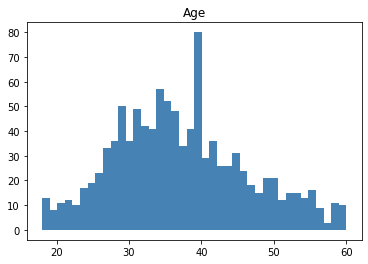

For Age, the number of bins whose value is zero is 0


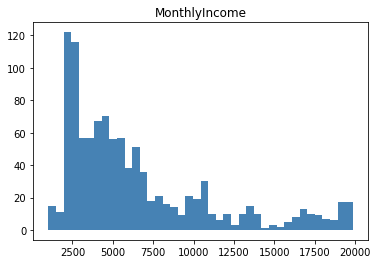

For MonthlyIncome, the number of bins whose value is zero is 0


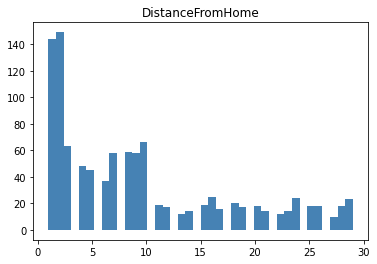

For DistanceFromHome, the number of bins whose value is zero is 11


In [6]:
all_yes = all[all['Attrition'] == 1].reset_index(drop=True)
all_no = all[all['Attrition'] == 0].reset_index(drop=True)
all_yes_test_size, all_no_test_size = int(len(all_yes.index)*0.1), int(len(all_no.index)*0.1)
all_yes_test, all_yes_train = all_yes[:all_yes_test_size], all_yes[all_yes_test_size:]
all_no_test, all_no_train = all_no[:all_no_test_size], all_no[all_no_test_size:]
print(f'yes test size: {len(all_yes_test.index)}')
print(f'yes train size: {len(all_yes_train.index)}')
print(f'no test size: {len(all_no_test.index)}')
print(f'no train size: {len(all_no_train.index)}')
train_set = pd.concat([all_yes_train, all_no_train])
train_set = train_set.iloc[np.random.permutation(len(train_set))].reset_index(drop=True)
test_set = pd.concat([all_yes_test, all_no_test])
test_set = test_set.iloc[np.random.permutation(len(test_set))].reset_index(drop=True)
train_set2 = train_set.copy(deep=True)
test_set2 = test_set.copy(deep=True)
train_set3 = train_set.copy(deep=True)
test_set3 = test_set.copy(deep=True)
cols = ['Age', 'MonthlyIncome', 'DistanceFromHome']
for col in cols:
  train_col_no_nan = train_set[~np.isnan(train_set[col])][col]
  hist, bin_edge = np.histogram(train_col_no_nan, 40)
  bin_edge = np.array(bin_edge, dtype=float)
  zero_bin = len([e for e in hist if e == 0])
  # print(hist)
  plt.fill_between(bin_edge.repeat(2)[1:-1], hist.repeat(2),facecolor='steelblue')
  plt.title(col)
  plt.show()
  print(f'For {col}, the number of bins whose value is zero is {zero_bin}')

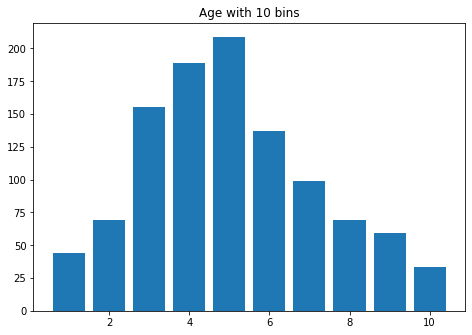

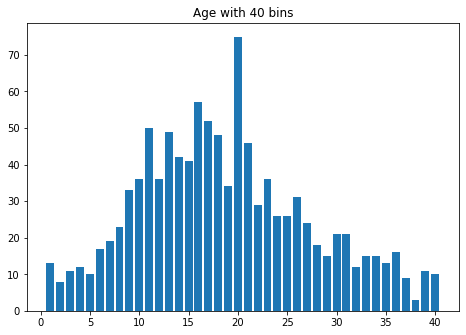

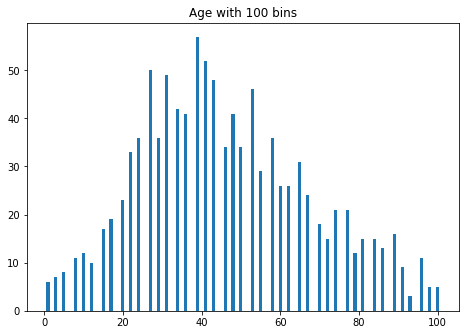

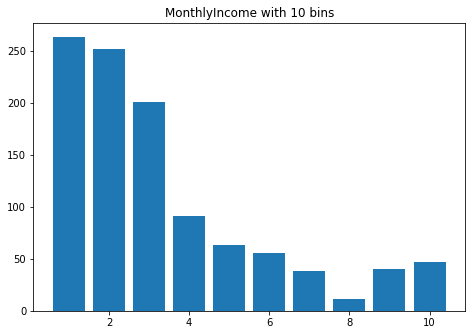

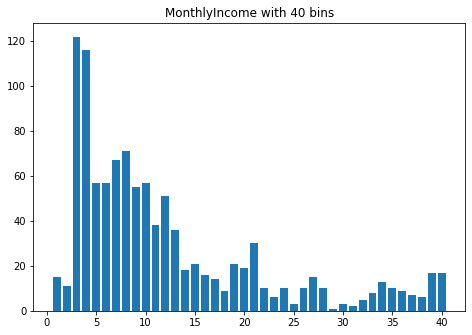

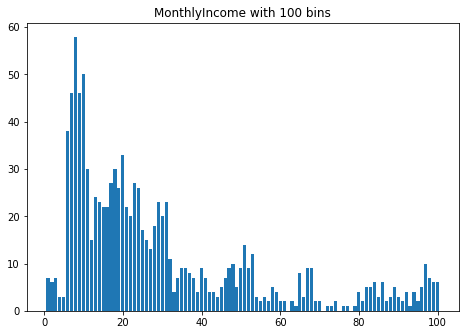

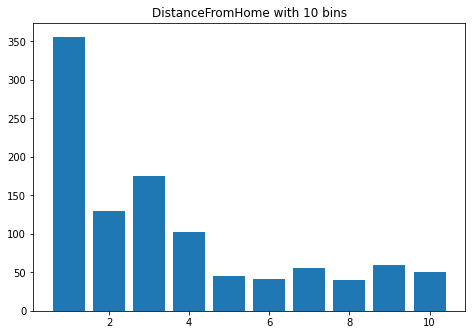

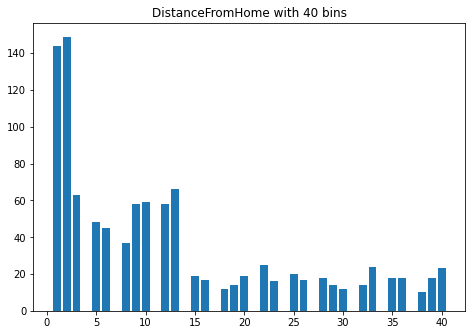

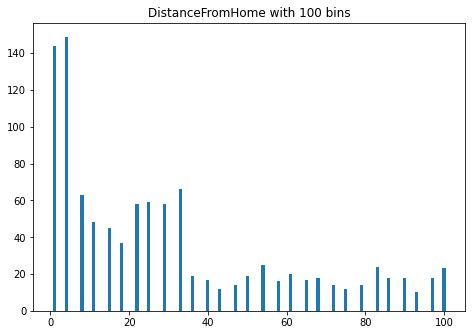

In [7]:
def plot_bin(col, bins):
  train_col_no_nan = np.array(train_set[~np.isnan(train_set[col])][col])
  max_val, min_val = np.max(train_col_no_nan), np.min(train_col_no_nan)
  # print(max_val, min_val)
  bins_range = np.linspace(min_val, max_val, bins+1).astype(float)
  bins_range[0] = -np.inf
  bins_range[len(bins_range)-1] = np.inf
  binning = np.digitize(train_col_no_nan, bins_range, True)
  bin_count = np.bincount(binning)[1:]
  fig = plt.figure()
  ax = fig.add_axes([0,0,1,1])
  x = np.arange(1,bins+1)
  ax.bar(x,bin_count)
  plt.title(f'{col} with {bins} bins')
  plt.show()
cols = ['Age', 'MonthlyIncome', 'DistanceFromHome']
bins = [10, 40, 100]
for col in cols:
  for bin in bins:
    plot_bin(col, bin)

In [8]:
def get_bin_range(df, col, bins):
  df_col_no_nan = np.array(df[~np.isnan(df[col])][col])
  max_val, min_val = np.max(df_col_no_nan), np.min(df_col_no_nan)
  bins_range = np.linspace(min_val, max_val, bins+1).astype(float)
  bins_range[0] = -np.inf
  bins_range[len(bins_range)-1] = np.inf
  return bins_range

def bucketize(df, col, bin_range):
  df_col = np.array(df[col])
  bucketize = np.digitize(df_col, bin_range)
  bin_num = len(bin_range) - 1
  bucketize = bucketize.astype(float)
  bucketize[bucketize > bin_num] = np.nan
  return bucketize

cols = [e for e in train_set.columns if e != 'Attrition']
float_cols = [e for e in cols if train_set[e].dtypes == 'float64']
for float_col in float_cols:
  bin_range = get_bin_range(train_set, float_col, 10)
  train_set[float_col] = bucketize(train_set, float_col, bin_range)
  # train_set[float_col] = train_set[float_col]
train_set

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,6.0,0.0,-1,1.0,1,NaN,1.0,3,10.0,7.0,1,10.0,NaN,8.0,3,1.0,1,9.0,2.0,2.0,0,1,3.0,1.0,10.0,10.0,1.0,6.0,NaN,7.0,6.0,6.0,8.0,6.0
1,6.0,0.0,-1,NaN,1,4.0,NaN,5,10.0,10.0,0,7.0,7.0,3.0,-1,7.0,1,3.0,NaN,2.0,-1,-1,NaN,NaN,1.0,10.0,4.0,3.0,4.0,10.0,3.0,NaN,7.0,3.0
2,5.0,0.0,2,5.0,1,1.0,6.0,5,10.0,NaN,0,NaN,NaN,6.0,4,10.0,-1,4.0,9.0,5.0,-1,0,5.0,1.0,10.0,10.0,1.0,4.0,6.0,10.0,2.0,3.0,1.0,2.0
3,4.0,0.0,-1,3.0,2,6.0,3.0,-1,10.0,7.0,0,6.0,NaN,3.0,7,1.0,2,3.0,NaN,NaN,-1,0,NaN,NaN,10.0,10.0,1.0,3.0,10.0,10.0,3.0,5.0,7.0,4.0
4,8.0,0.0,-1,5.0,1,NaN,6.0,3,10.0,7.0,1,5.0,7.0,8.0,5,NaN,1,9.0,2.0,6.0,0,0,4.0,1.0,10.0,10.0,NaN,8.0,NaN,7.0,2.0,NaN,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319,7.0,0.0,2,NaN,1,3.0,NaN,1,10.0,NaN,0,5.0,7.0,1.0,2,7.0,-1,1.0,NaN,5.0,0,0,1.0,1.0,7.0,10.0,1.0,2.0,4.0,7.0,1.0,2.0,2.0,1.0
1320,5.0,0.0,0,9.0,0,1.0,6.0,0,10.0,1.0,1,10.0,7.0,1.0,-1,4.0,0,1.0,3.0,6.0,-1,0,2.0,1.0,10.0,10.0,10.0,4.0,6.0,7.0,4.0,6.0,3.0,NaN
1321,4.0,0.0,-1,4.0,1,1.0,1.0,-1,10.0,1.0,1,3.0,7.0,NaN,0,NaN,2,NaN,9.0,NaN,0,0,5.0,1.0,7.0,10.0,NaN,NaN,2.0,4.0,NaN,NaN,NaN,3.0
1322,4.0,0.0,2,6.0,-1,2.0,3.0,1,10.0,10.0,0,6.0,4.0,NaN,6,4.0,1,NaN,6.0,4.0,0,0,1.0,1.0,1.0,NaN,NaN,NaN,4.0,7.0,2.0,1.0,2.0,3.0


P(MonthlyIncome | Attrition = positive), P(JobRole | Attrition = positive), P(HourlyRate | Attrition = positive), P(MaritalStatus | Attrition = positive)

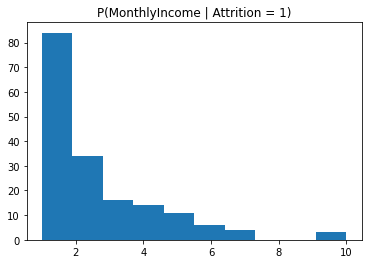

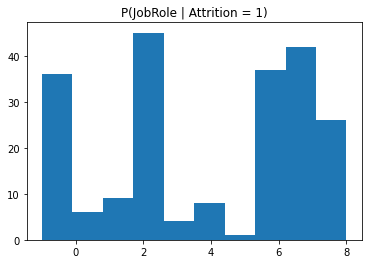

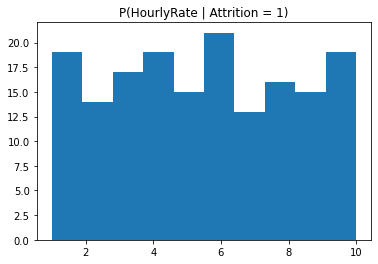

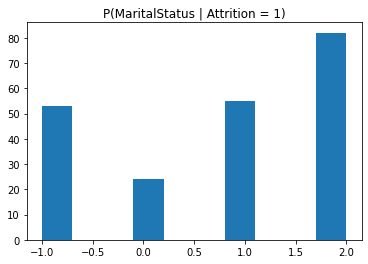

In [9]:
train_positive = train_set[train_set['Attrition'] == 1]
col_list = ['MonthlyIncome', 'JobRole', 'HourlyRate', 'MaritalStatus']
for col in col_list:
  y = np.array(train_positive[col])
  plt.hist(y)
  plt.title(f'P({col} | Attrition = 1)')
  plt.show()

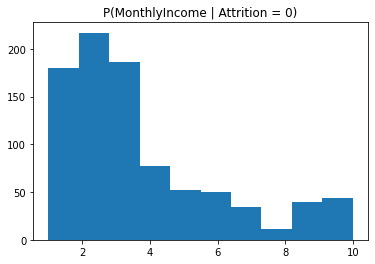

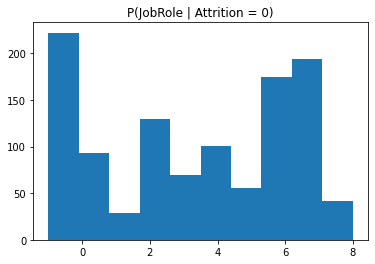

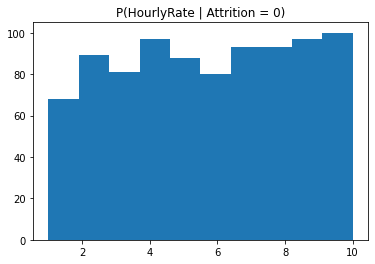

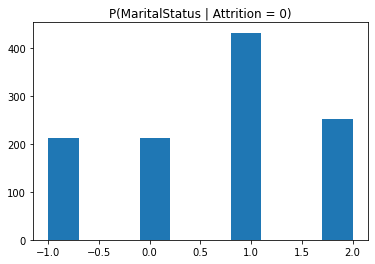

In [10]:
train_negative = train_set[train_set['Attrition'] == 0]
col_list = ['MonthlyIncome', 'JobRole', 'HourlyRate', 'MaritalStatus']
for col in col_list:
  y = np.array(train_negative[col])
  plt.hist(y)
  plt.title(f'P({col} | Attrition = 0)')
  plt.show()

$P(Attrition = 1)$ = $\frac{number of Attrition = 1}{number of rows}$

{1.0: 0.024608501118568233, 2.0: 0.053691275167785234, 3.0: 0.13870246085011187, 4.0: 0.17225950782997762, 5.0: 0.1789709172259508, 6.0: 0.1767337807606264, 7.0: 0.09843400447427293, 8.0: 0.06935123042505593, 9.0: 0.05704697986577181, 10.0: 0.030201342281879196}


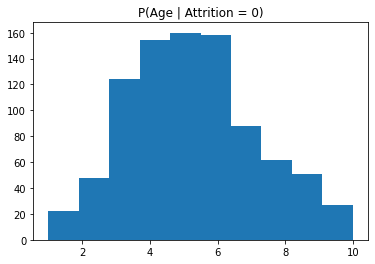

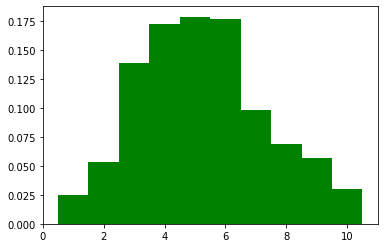

{-1: 0.2036036036036036, 0: 0.0891891891891892, 1: 0.13063063063063063, 2: 0.5765765765765766}


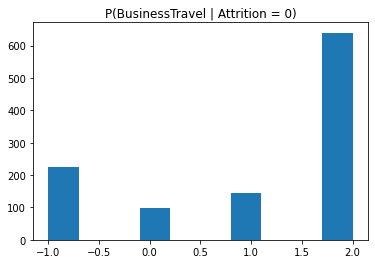

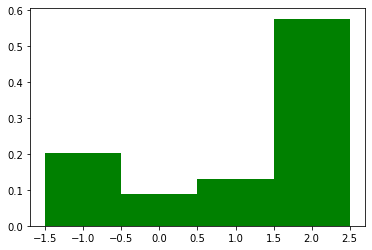

{1.0: 0.10614525139664804, 2.0: 0.09050279329608939, 3.0: 0.09497206703910614, 4.0: 0.11508379888268157, 5.0: 0.08826815642458101, 6.0: 0.09497206703910614, 7.0: 0.09385474860335195, 8.0: 0.11173184357541899, 9.0: 0.10614525139664804, 10.0: 0.09832402234636871}


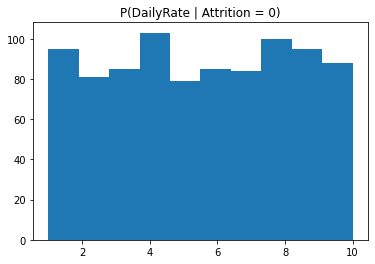

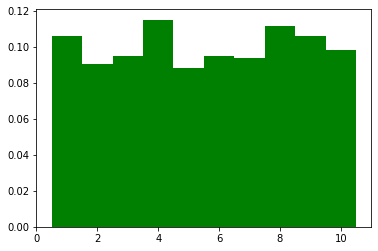

{-1: 0.1963963963963964, 0: 0.03423423423423423, 1: 0.5405405405405406, 2: 0.22882882882882882}


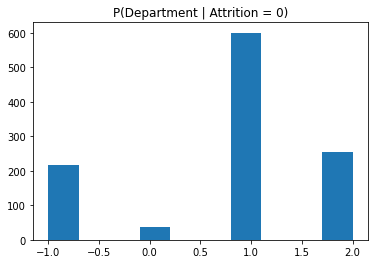

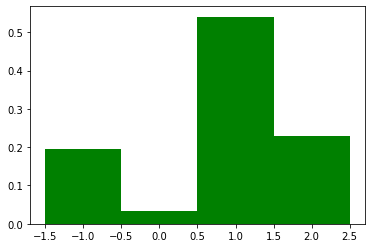

{1.0: 0.35119726339794755, 2.0: 0.12884834663625996, 3.0: 0.16875712656784492, 4.0: 0.09578107183580388, 5.0: 0.02280501710376283, 6.0: 0.05131128848346636, 7.0: 0.05131128848346636, 8.0: 0.03534777651083238, 9.0: 0.04789053591790194, 10.0: 0.046750285062713795}


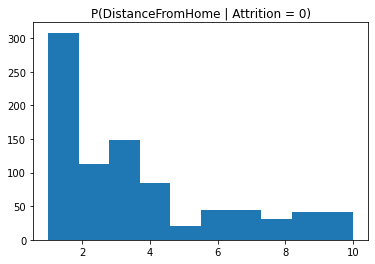

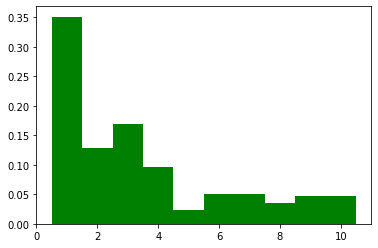

{1.0: 0.10921501706484642, 3.0: 0.19340159271899887, 6.0: 0.38111490329920367, 8.0: 0.27986348122866894, 10.0: 0.03640500568828214}


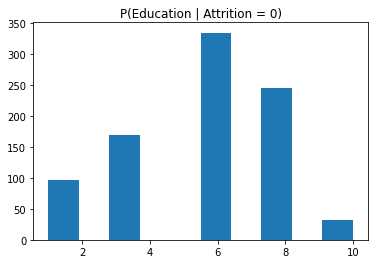

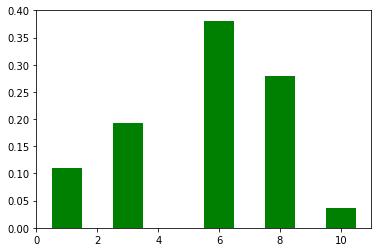

{-1: 0.1963963963963964, 0: 0.012612612612612612, 1: 0.3342342342342342, 2: 0.07567567567567568, 3: 0.2648648648648649, 4: 0.04684684684684685, 5: 0.06936936936936937}


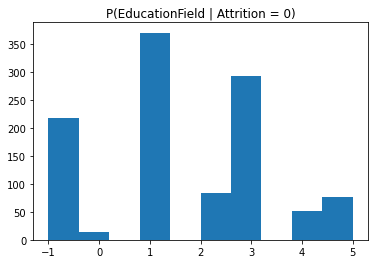

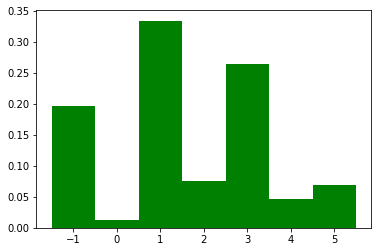

{10.0: 1.0}


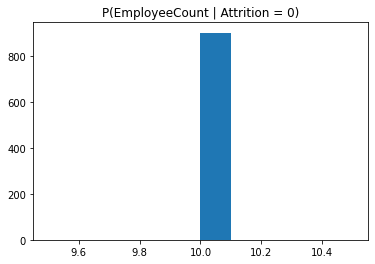

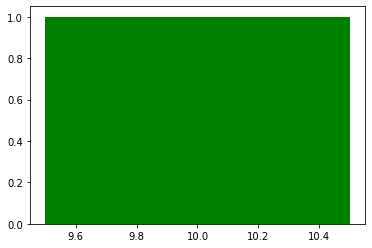

{1.0: 0.16703786191536749, 4.0: 0.18485523385300667, 7.0: 0.3273942093541203, 10.0: 0.3207126948775056}


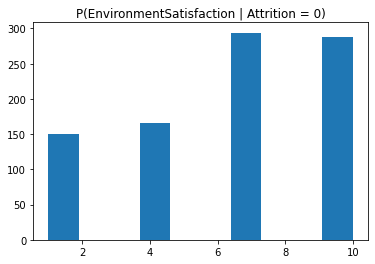

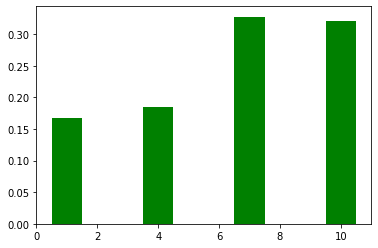

{-1: 0.2036036036036036, 0: 0.3342342342342342, 1: 0.46216216216216216}


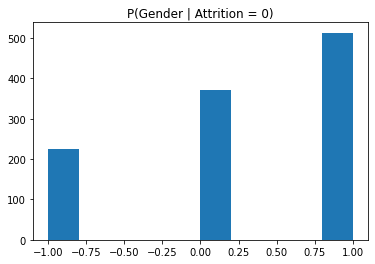

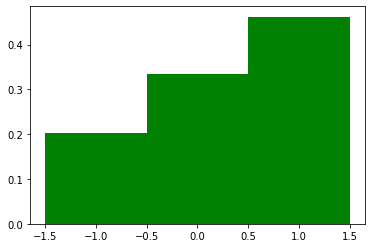

{1.0: 0.07674943566591422, 2.0: 0.10045146726862303, 3.0: 0.09142212189616253, 4.0: 0.10948081264108352, 5.0: 0.09932279909706546, 6.0: 0.09029345372460497, 7.0: 0.10496613995485328, 8.0: 0.10496613995485328, 9.0: 0.10948081264108352, 10.0: 0.11286681715575621}


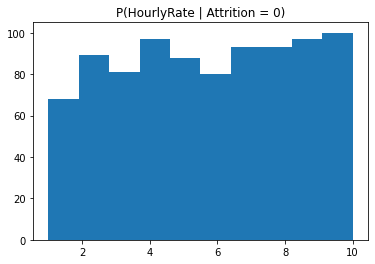

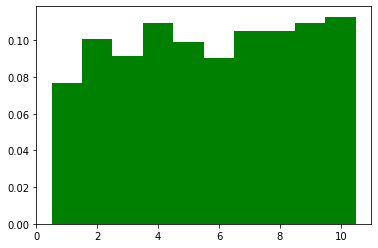

{1.0: 0.04406779661016949, 4.0: 0.25310734463276835, 7.0: 0.5943502824858757, 10.0: 0.10847457627118644}


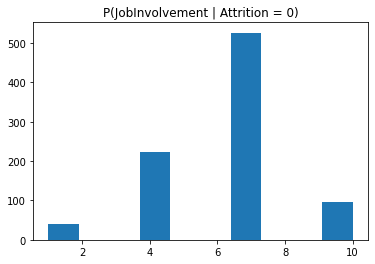

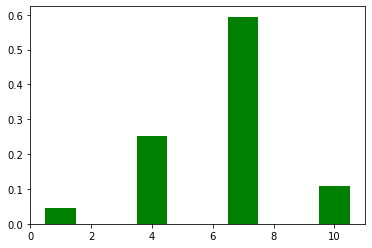

{1.0: 0.31363636363636366, 3.0: 0.39090909090909093, 6.0: 0.15454545454545454, 8.0: 0.09431818181818181, 10.0: 0.04659090909090909}


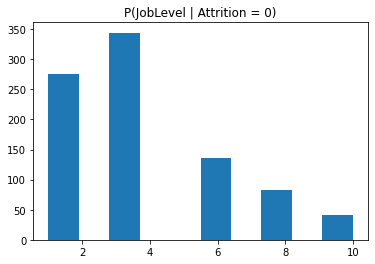

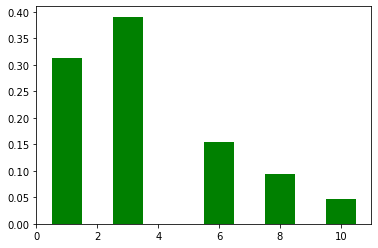

{-1: 0.2, 0: 0.08378378378378379, 1: 0.026126126126126126, 2: 0.11621621621621622, 3: 0.062162162162162166, 4: 0.09099099099099099, 5: 0.05045045045045045, 6: 0.15765765765765766, 7: 0.17477477477477477, 8: 0.03783783783783784}


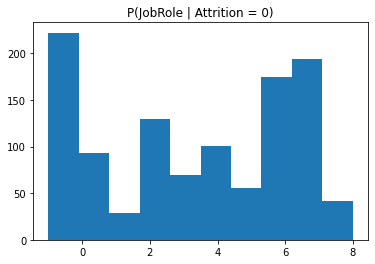

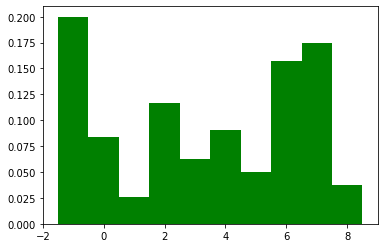

{1.0: 0.1870748299319728, 4.0: 0.1870748299319728, 7.0: 0.2947845804988662, 10.0: 0.3310657596371882}


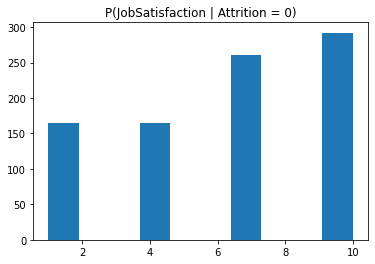

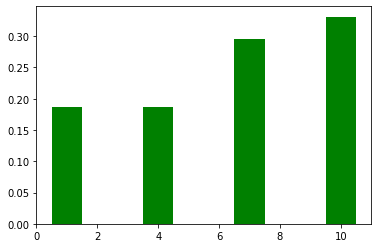

{-1: 0.1918918918918919, 0: 0.19099099099099098, 1: 0.3891891891891892, 2: 0.22792792792792793}


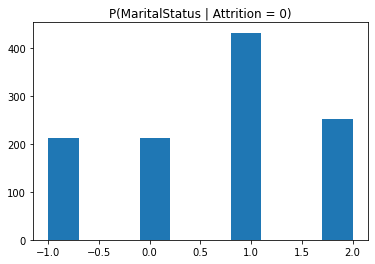

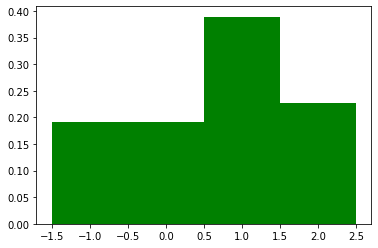

{1.0: 0.20202020202020202, 2.0: 0.24354657687991021, 3.0: 0.20875420875420875, 4.0: 0.08641975308641975, 5.0: 0.058361391694725026, 6.0: 0.05611672278338945, 7.0: 0.038159371492704826, 8.0: 0.012345679012345678, 9.0: 0.04489337822671156, 10.0: 0.04938271604938271}


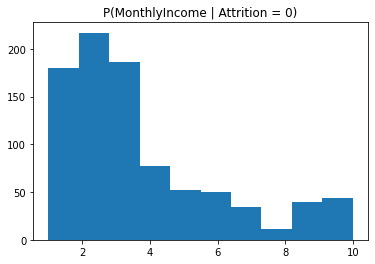

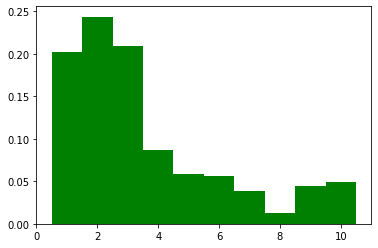

{1.0: 0.09797297297297297, 2.0: 0.12162162162162163, 3.0: 0.10810810810810811, 4.0: 0.09234234234234234, 5.0: 0.10247747747747747, 6.0: 0.09121621621621621, 7.0: 0.10022522522522523, 8.0: 0.10022522522522523, 9.0: 0.10923423423423423, 10.0: 0.07657657657657657}


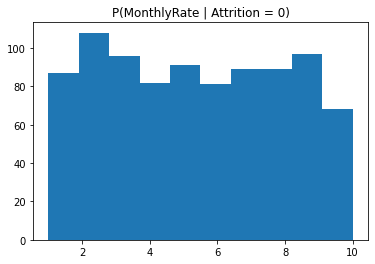

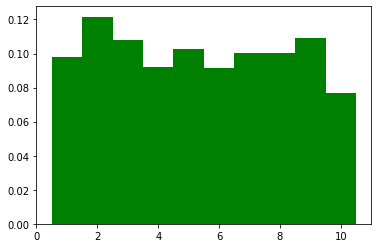

{1.0: 0.12954545454545455, 2.0: 0.3431818181818182, 3.0: 0.10454545454545454, 4.0: 0.11931818181818182, 5.0: 0.10454545454545454, 6.0: 0.035227272727272725, 7.0: 0.04431818181818182, 8.0: 0.045454545454545456, 9.0: 0.03636363636363636, 10.0: 0.0375}


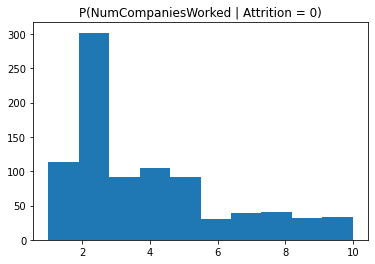

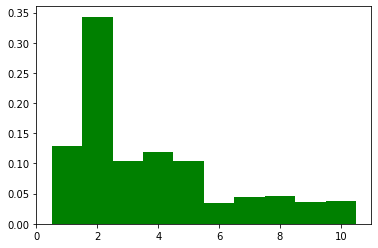

{-1: 0.1990990990990991, 0: 0.8009009009009009}


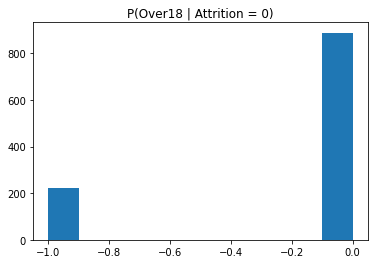

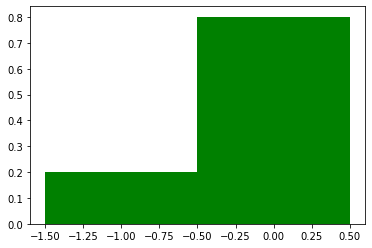

{-1: 0.1972972972972973, 0: 0.6135135135135135, 1: 0.1891891891891892}


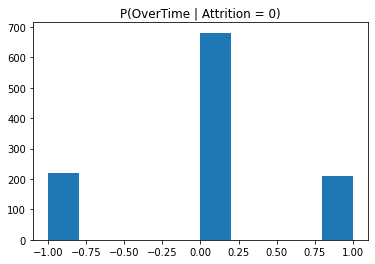

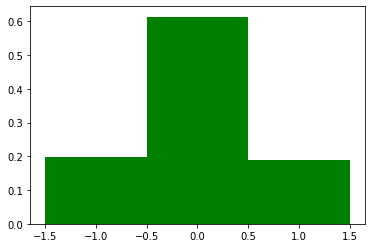

{1.0: 0.2615558060879369, 2.0: 0.13979706877113868, 3.0: 0.21420518602029312, 4.0: 0.05749718151071026, 5.0: 0.060879368658399095, 6.0: 0.11950394588500564, 7.0: 0.03720405862457723, 8.0: 0.06538895152198422, 9.0: 0.016910935738444193, 10.0: 0.02705749718151071}


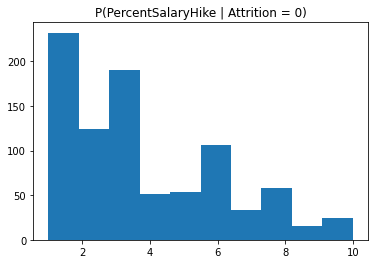

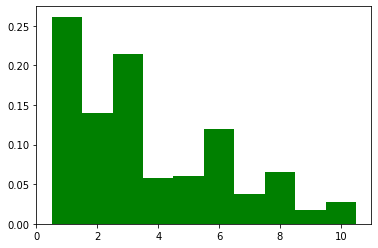

{1.0: 0.8571428571428571, 10.0: 0.14285714285714285}


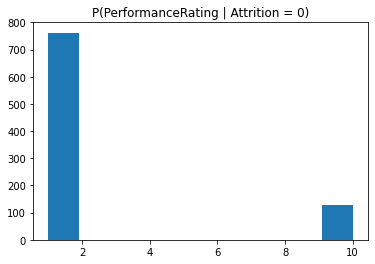

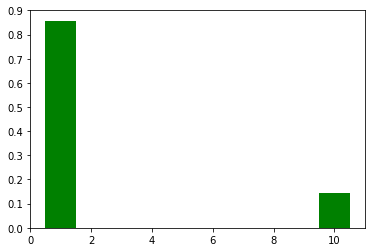

{1.0: 0.18888888888888888, 4.0: 0.21666666666666667, 7.0: 0.30333333333333334, 10.0: 0.2911111111111111}


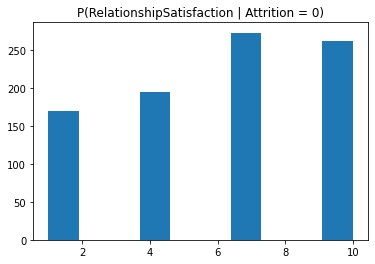

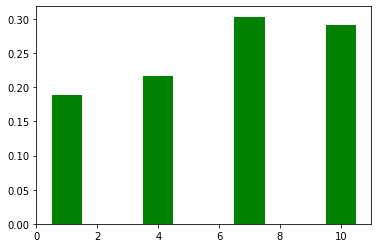

{10.0: 1.0}


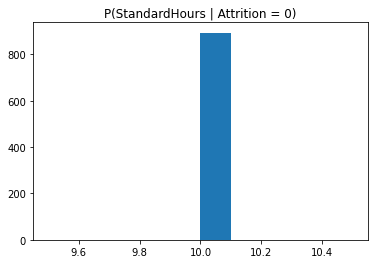

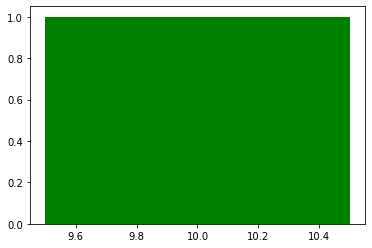

{1.0: 0.39414414414414417, 4.0: 0.45157657657657657, 7.0: 0.10698198198198199, 10.0: 0.0472972972972973}


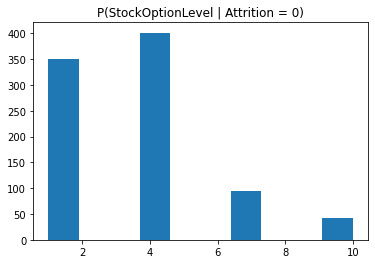

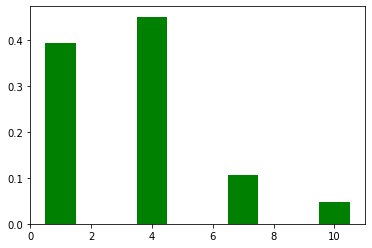

{1.0: 0.08044692737430167, 2.0: 0.2335195530726257, 3.0: 0.3240223463687151, 4.0: 0.10726256983240223, 5.0: 0.07709497206703911, 6.0: 0.0782122905027933, 7.0: 0.03687150837988827, 8.0: 0.03128491620111732, 9.0: 0.0223463687150838, 10.0: 0.008938547486033519}


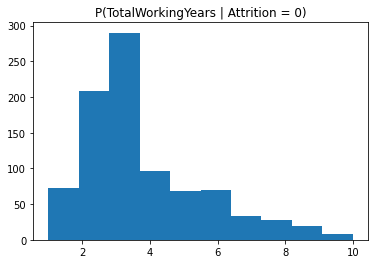

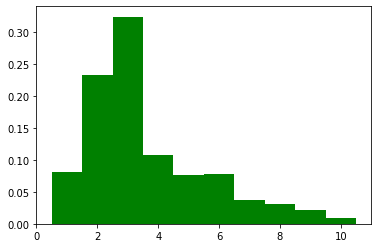

{1.0: 0.03724604966139955, 2.0: 0.050790067720090294, 4.0: 0.3600451467268623, 6.0: 0.3363431151241535, 7.0: 0.07787810383747178, 9.0: 0.09480812641083522, 10.0: 0.04288939051918736}


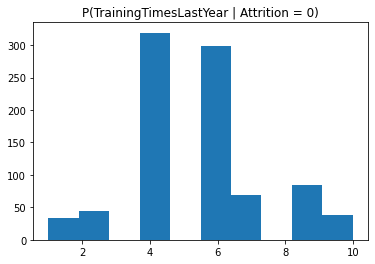

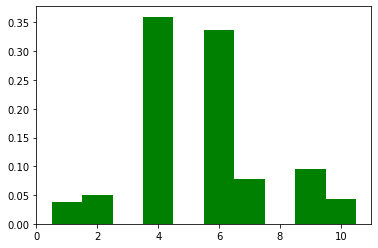

{1.0: 0.043673012318029114, 4.0: 0.22732362821948487, 7.0: 0.6237402015677491, 10.0: 0.10526315789473684}


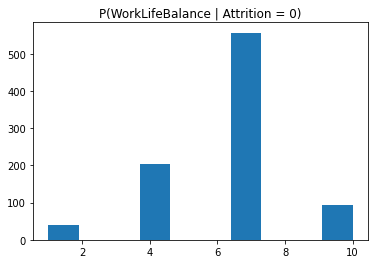

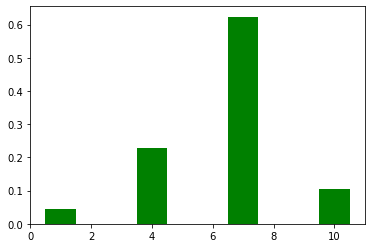

{1.0: 0.2696629213483146, 2.0: 0.34831460674157305, 3.0: 0.20224719101123595, 4.0: 0.060674157303370786, 5.0: 0.028089887640449437, 6.0: 0.05393258426966292, 7.0: 0.020224719101123594, 8.0: 0.0033707865168539327, 9.0: 0.0056179775280898875, 10.0: 0.007865168539325843}


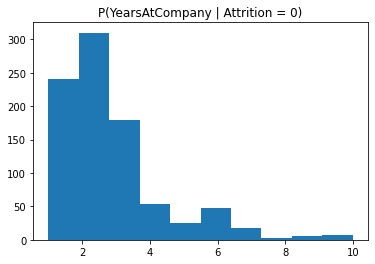

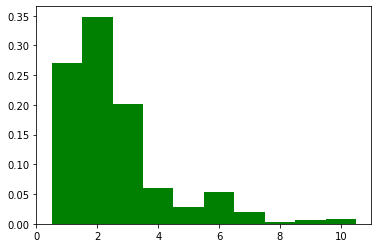

{1.0: 0.17620650953984288, 2.0: 0.33557800224466894, 3.0: 0.09764309764309764, 4.0: 0.1941638608305275, 5.0: 0.06958473625140292, 6.0: 0.07519640852974187, 7.0: 0.02356902356902357, 8.0: 0.013468013468013467, 9.0: 0.01122334455667789, 10.0: 0.003367003367003367}


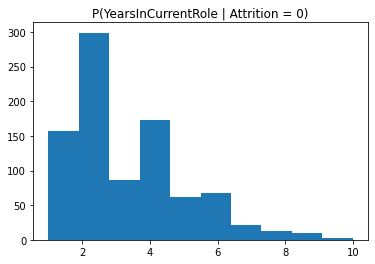

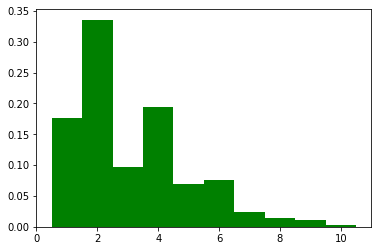

{1.0: 0.6362612612612613, 2.0: 0.10472972972972973, 3.0: 0.07657657657657657, 4.0: 0.02927927927927928, 5.0: 0.08220720720720721, 6.0: 0.013513513513513514, 7.0: 0.013513513513513514, 8.0: 0.019144144144144143, 9.0: 0.01126126126126126, 10.0: 0.013513513513513514}


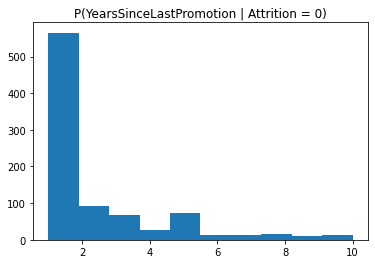

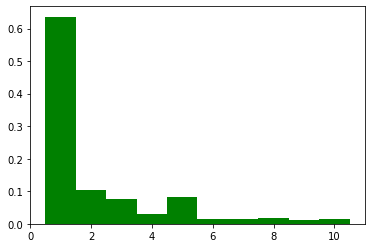

{1.0: 0.19004524886877827, 2.0: 0.35180995475113125, 3.0: 0.08710407239819004, 4.0: 0.019230769230769232, 5.0: 0.22963800904977374, 6.0: 0.07013574660633484, 7.0: 0.014705882352941176, 8.0: 0.024886877828054297, 9.0: 0.006787330316742082, 10.0: 0.005656108597285068}


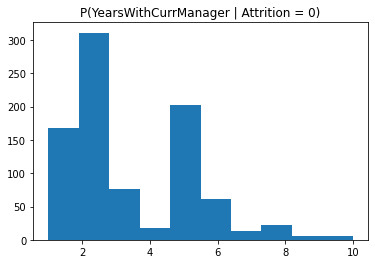

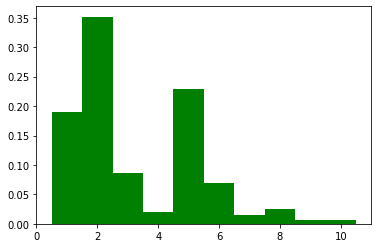

{1.0: 0.1301775147928994, 2.0: 0.1242603550295858, 3.0: 0.1834319526627219, 4.0: 0.20710059171597633, 5.0: 0.08875739644970414, 6.0: 0.07692307692307693, 7.0: 0.0650887573964497, 8.0: 0.04142011834319527, 9.0: 0.047337278106508875, 10.0: 0.03550295857988166}


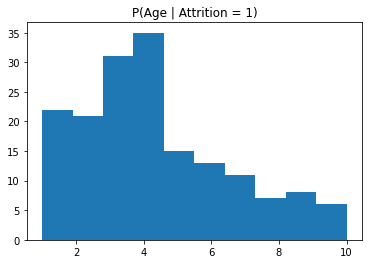

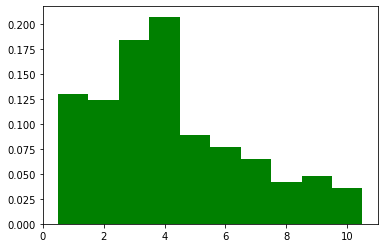

{-1: 0.18691588785046728, 0: 0.04205607476635514, 1: 0.2523364485981308, 2: 0.5186915887850467}


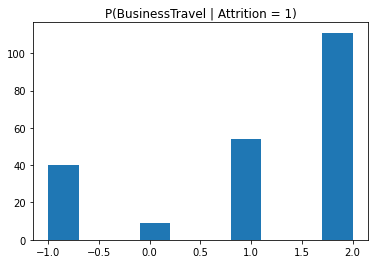

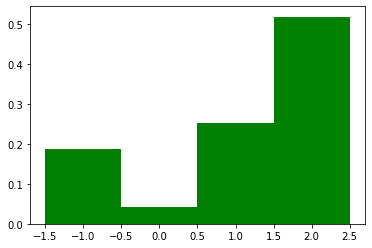

{1.0: 0.0975609756097561, 2.0: 0.15853658536585366, 3.0: 0.09146341463414634, 4.0: 0.12804878048780488, 5.0: 0.08536585365853659, 6.0: 0.08536585365853659, 7.0: 0.06707317073170732, 8.0: 0.10365853658536585, 9.0: 0.07926829268292683, 10.0: 0.10365853658536585}


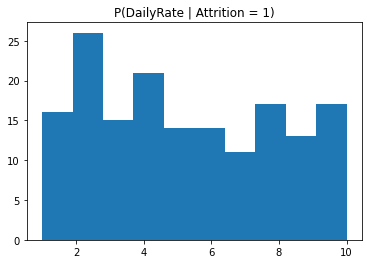

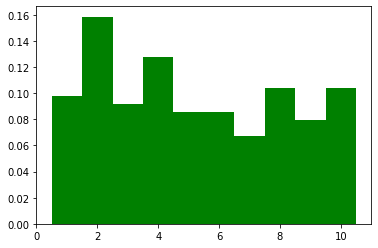

{-1: 0.22897196261682243, 0: 0.04672897196261682, 1: 0.4158878504672897, 2: 0.308411214953271}


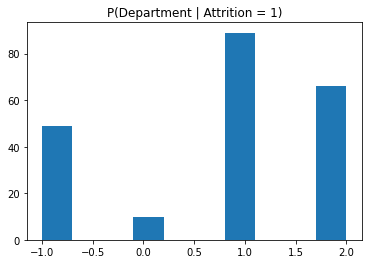

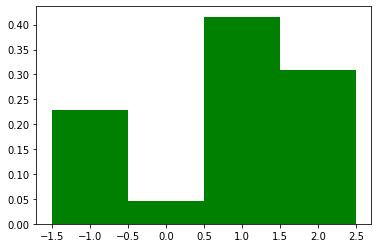

{1.0: 0.2696629213483146, 2.0: 0.09550561797752809, 3.0: 0.15168539325842698, 4.0: 0.10112359550561797, 5.0: 0.033707865168539325, 6.0: 0.08426966292134831, 7.0: 0.056179775280898875, 8.0: 0.05056179775280899, 9.0: 0.10112359550561797, 10.0: 0.056179775280898875}


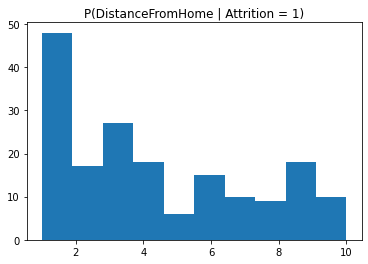

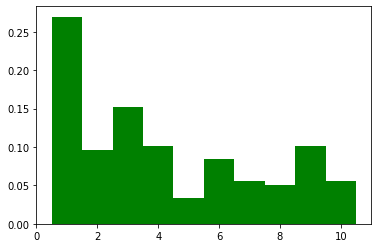

{1.0: 0.12994350282485875, 3.0: 0.1864406779661017, 6.0: 0.4293785310734463, 8.0: 0.22598870056497175, 10.0: 0.02824858757062147}


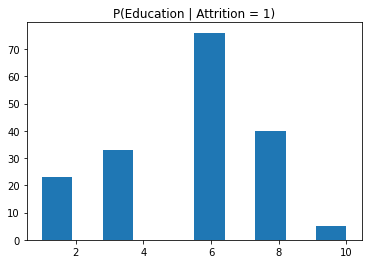

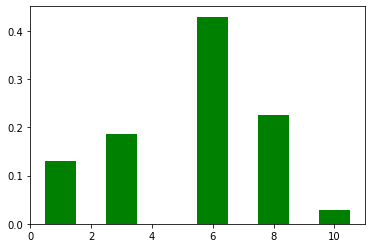

{-1: 0.20093457943925233, 0: 0.02336448598130841, 1: 0.2803738317757009, 2: 0.12149532710280374, 3: 0.22429906542056074, 4: 0.04672897196261682, 5: 0.102803738317757}


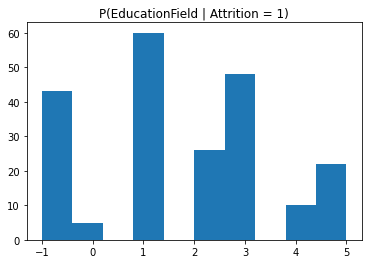

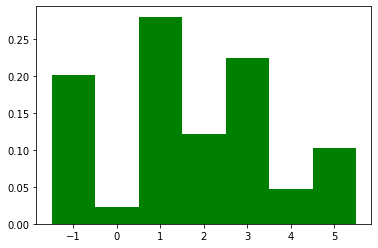

{10.0: 1.0}


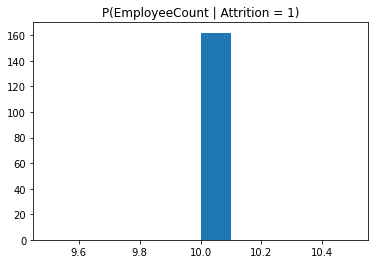

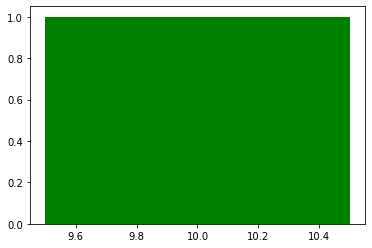

{1.0: 0.2981366459627329, 4.0: 0.17391304347826086, 7.0: 0.2422360248447205, 10.0: 0.2857142857142857}


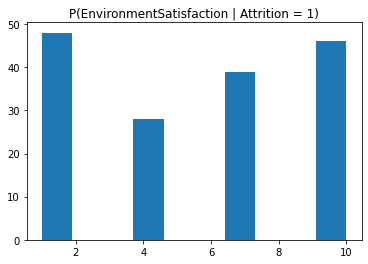

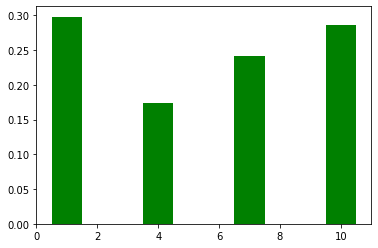

{-1: 0.18691588785046728, 0: 0.308411214953271, 1: 0.5046728971962616}


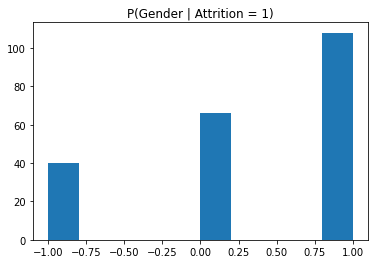

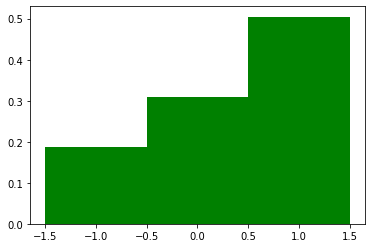

{1.0: 0.1130952380952381, 2.0: 0.08333333333333333, 3.0: 0.10119047619047619, 4.0: 0.1130952380952381, 5.0: 0.08928571428571429, 6.0: 0.125, 7.0: 0.07738095238095238, 8.0: 0.09523809523809523, 9.0: 0.08928571428571429, 10.0: 0.1130952380952381}


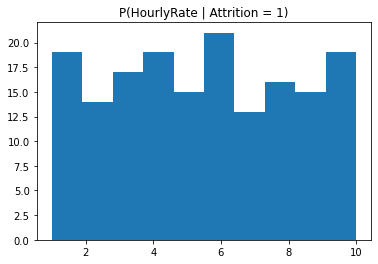

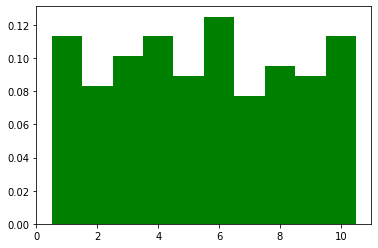

{1.0: 0.10344827586206896, 4.0: 0.28160919540229884, 7.0: 0.5574712643678161, 10.0: 0.05747126436781609}


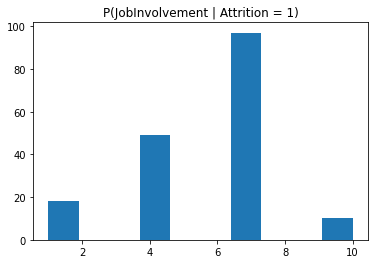

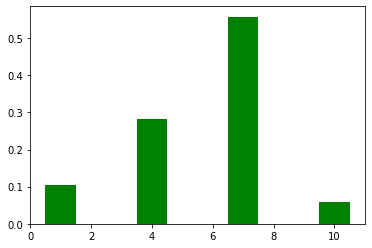

{1.0: 0.6123595505617978, 3.0: 0.2303370786516854, 6.0: 0.11235955056179775, 8.0: 0.02247191011235955, 10.0: 0.02247191011235955}


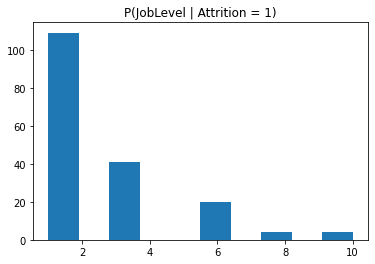

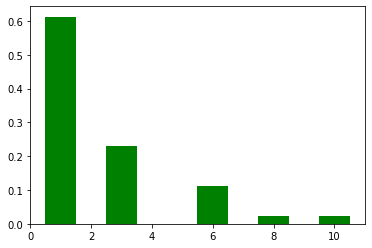

{-1: 0.16822429906542055, 0: 0.028037383177570093, 1: 0.04205607476635514, 2: 0.2102803738317757, 3: 0.018691588785046728, 4: 0.037383177570093455, 5: 0.004672897196261682, 6: 0.17289719626168223, 7: 0.19626168224299065, 8: 0.12149532710280374}


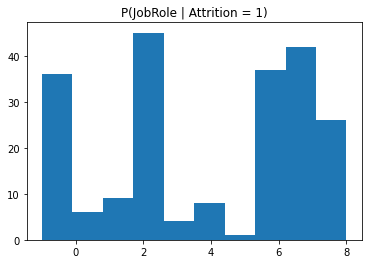

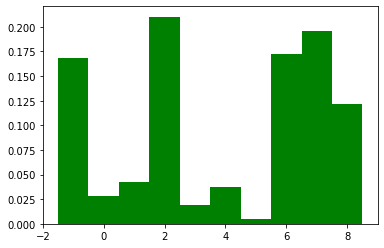

{1.0: 0.2411764705882353, 4.0: 0.21176470588235294, 7.0: 0.3058823529411765, 10.0: 0.2411764705882353}


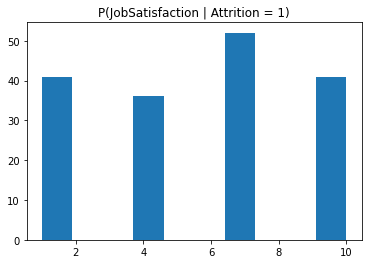

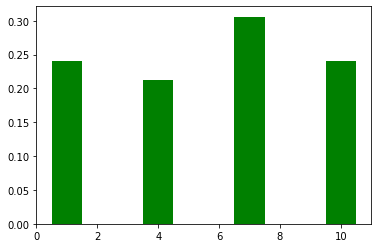

{-1: 0.24766355140186916, 0: 0.11214953271028037, 1: 0.2570093457943925, 2: 0.38317757009345793}


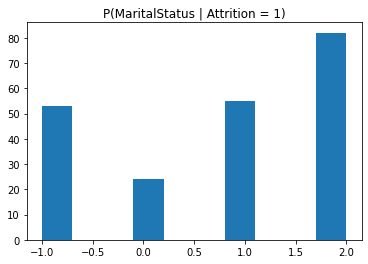

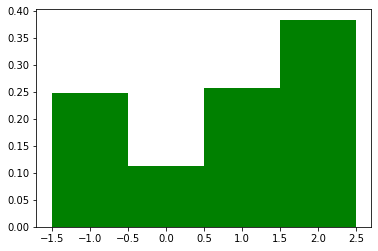

{1.0: 0.4883720930232558, 2.0: 0.19767441860465115, 3.0: 0.09302325581395349, 4.0: 0.08139534883720931, 5.0: 0.06395348837209303, 6.0: 0.03488372093023256, 7.0: 0.023255813953488372, 10.0: 0.01744186046511628}


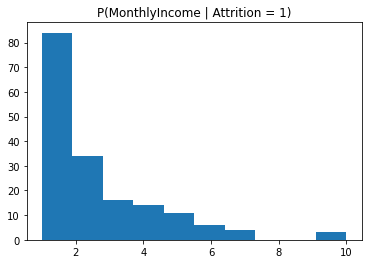

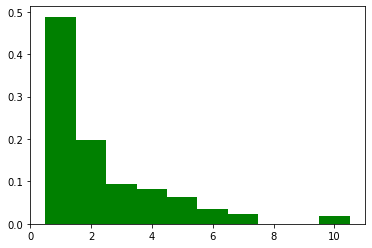

{1.0: 0.10119047619047619, 2.0: 0.07738095238095238, 3.0: 0.09523809523809523, 4.0: 0.14285714285714285, 5.0: 0.08928571428571429, 6.0: 0.09523809523809523, 7.0: 0.09523809523809523, 8.0: 0.10714285714285714, 9.0: 0.08928571428571429, 10.0: 0.10714285714285714}


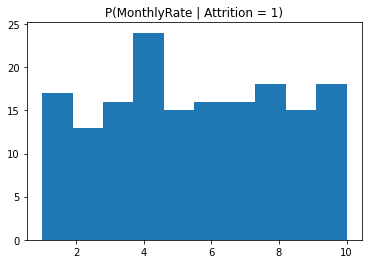

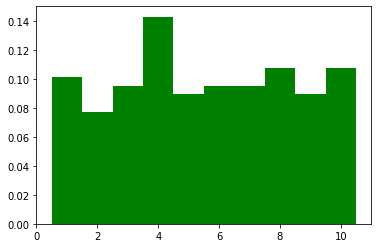

{1.0: 0.10674157303370786, 2.0: 0.38202247191011235, 3.0: 0.07303370786516854, 4.0: 0.07865168539325842, 5.0: 0.07303370786516854, 6.0: 0.07865168539325842, 7.0: 0.056179775280898875, 8.0: 0.07303370786516854, 9.0: 0.02247191011235955, 10.0: 0.056179775280898875}


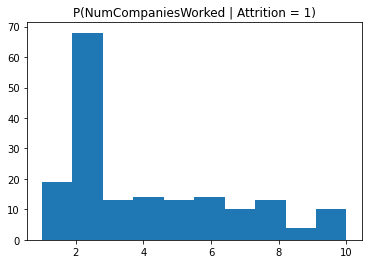

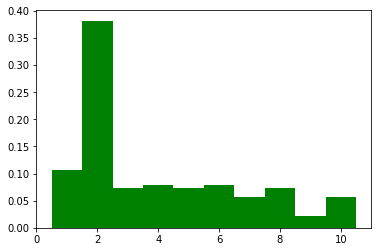

{-1: 0.205607476635514, 0: 0.794392523364486}


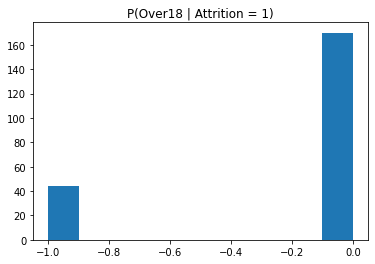

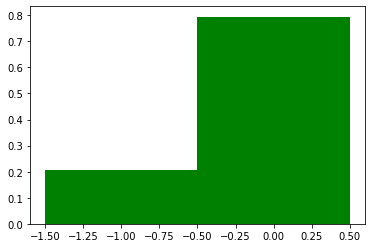

{-1: 0.2383177570093458, 0: 0.37850467289719625, 1: 0.38317757009345793}


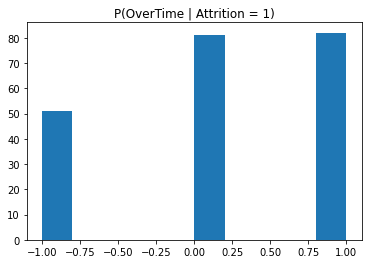

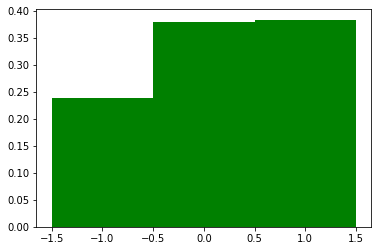

{1.0: 0.32967032967032966, 2.0: 0.15934065934065933, 3.0: 0.16483516483516483, 4.0: 0.04945054945054945, 5.0: 0.06593406593406594, 6.0: 0.08241758241758242, 7.0: 0.038461538461538464, 8.0: 0.04945054945054945, 9.0: 0.027472527472527472, 10.0: 0.03296703296703297}


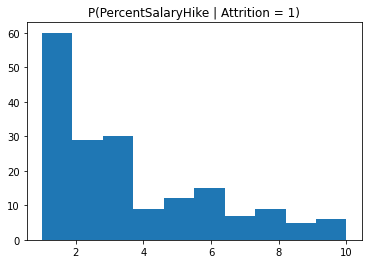

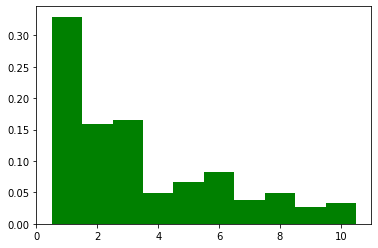

{1.0: 0.8411764705882353, 10.0: 0.1588235294117647}


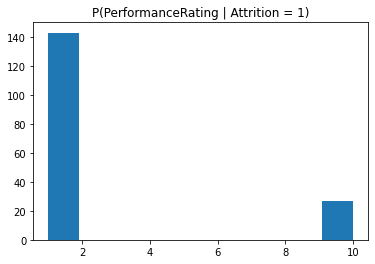

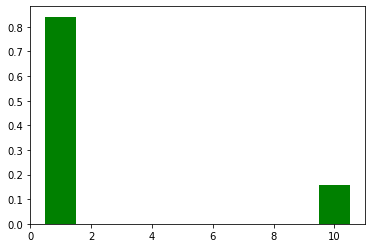

{1.0: 0.2621951219512195, 4.0: 0.18902439024390244, 7.0: 0.29878048780487804, 10.0: 0.25}


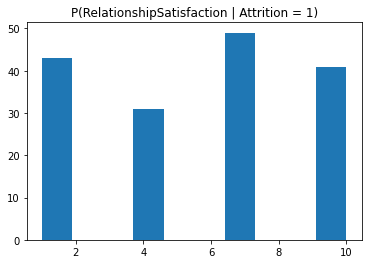

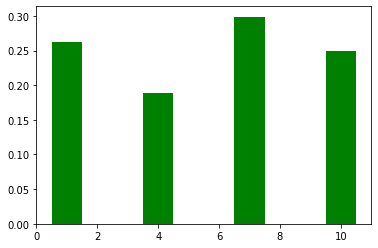

{10.0: 1.0}


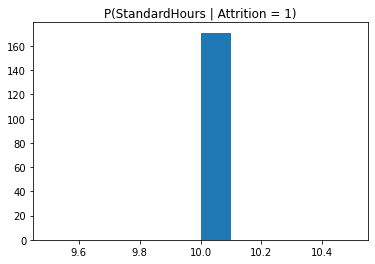

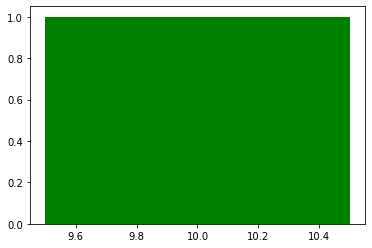

{1.0: 0.6608187134502924, 4.0: 0.2222222222222222, 7.0: 0.06432748538011696, 10.0: 0.05263157894736842}


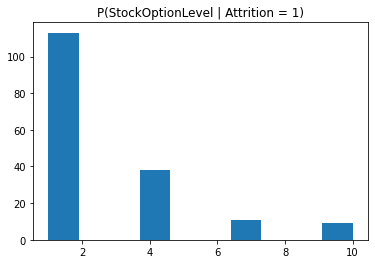

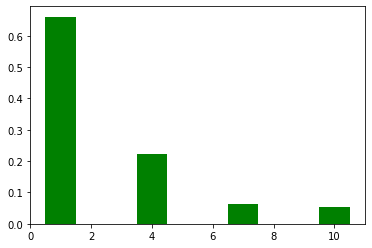

{1.0: 0.24096385542168675, 2.0: 0.3192771084337349, 3.0: 0.22289156626506024, 4.0: 0.0783132530120482, 5.0: 0.060240963855421686, 6.0: 0.030120481927710843, 7.0: 0.024096385542168676, 8.0: 0.012048192771084338, 9.0: 0.006024096385542169, 10.0: 0.006024096385542169}


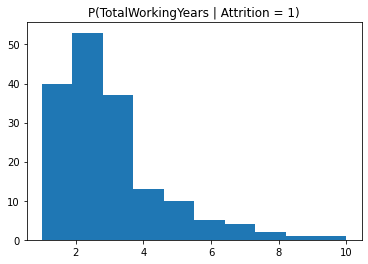

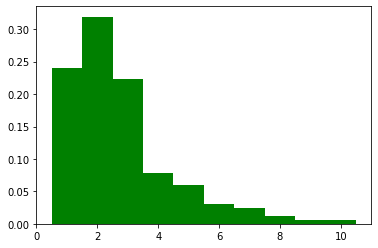

{1.0: 0.05084745762711865, 2.0: 0.04519774011299435, 4.0: 0.423728813559322, 6.0: 0.2824858757062147, 7.0: 0.11864406779661017, 9.0: 0.06779661016949153, 10.0: 0.011299435028248588}


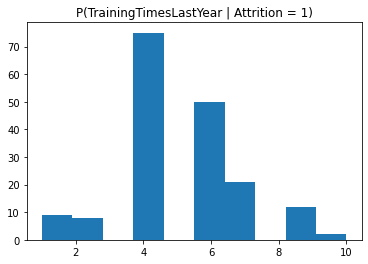

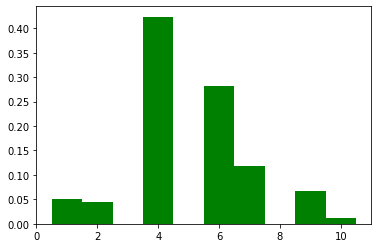

{1.0: 0.10919540229885058, 4.0: 0.22413793103448276, 7.0: 0.5229885057471264, 10.0: 0.14367816091954022}


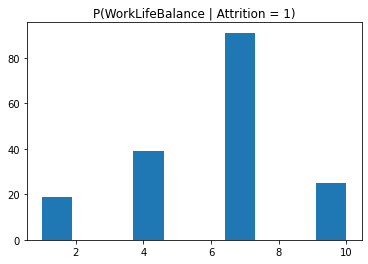

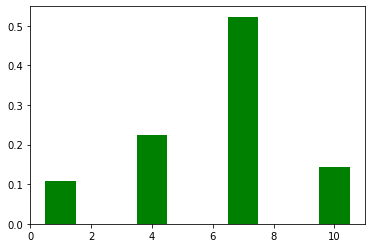

{1.0: 0.49411764705882355, 2.0: 0.2411764705882353, 3.0: 0.17058823529411765, 4.0: 0.03529411764705882, 5.0: 0.01764705882352941, 6.0: 0.01764705882352941, 7.0: 0.011764705882352941, 9.0: 0.0058823529411764705, 10.0: 0.0058823529411764705}


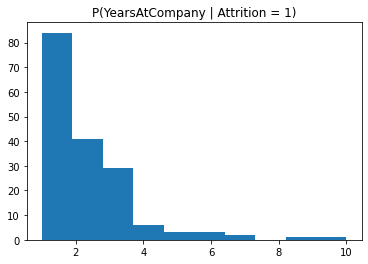

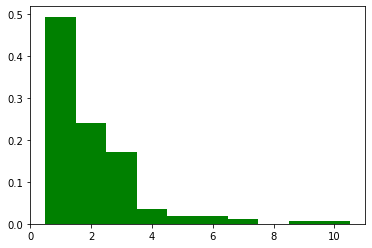

{1.0: 0.31547619047619047, 2.0: 0.375, 3.0: 0.05357142857142857, 4.0: 0.15476190476190477, 5.0: 0.03571428571428571, 6.0: 0.041666666666666664, 7.0: 0.005952380952380952, 8.0: 0.011904761904761904, 9.0: 0.005952380952380952}


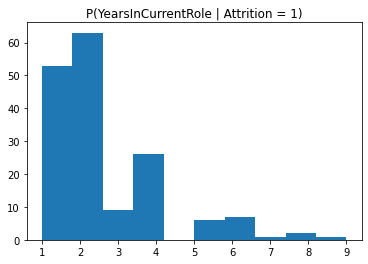

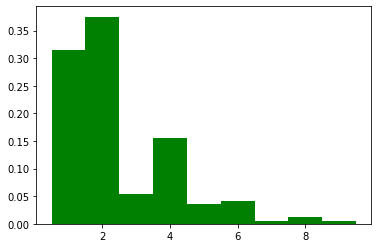

{1.0: 0.6705202312138728, 2.0: 0.11560693641618497, 3.0: 0.057803468208092484, 4.0: 0.011560693641618497, 5.0: 0.09248554913294797, 7.0: 0.017341040462427744, 8.0: 0.011560693641618497, 9.0: 0.011560693641618497, 10.0: 0.011560693641618497}


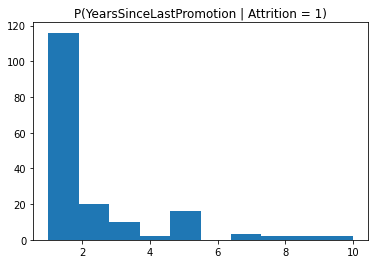

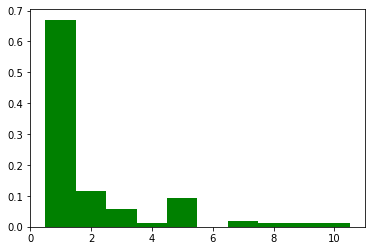

{1.0: 0.41714285714285715, 2.0: 0.2742857142857143, 3.0: 0.06285714285714286, 4.0: 0.005714285714285714, 5.0: 0.17714285714285713, 6.0: 0.045714285714285714, 7.0: 0.005714285714285714, 9.0: 0.011428571428571429}


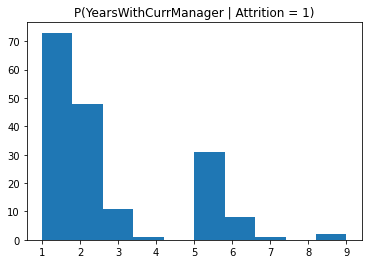

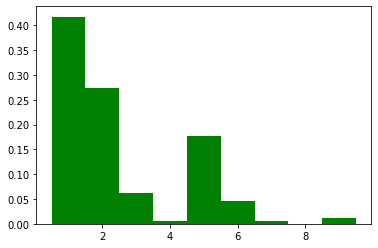

In [11]:
features = [e for e in list(train_set.columns) if e != 'Attrition']
classes = [0, 1]
prob_feature_given_class = {}
for class_ in classes:
  for col in features:
    df_class = train_set[train_set['Attrition'] == class_]
    y = np.array(df_class[~np.isnan(df_class[col])][col])
    unique, counts = np.unique(y, return_counts=True)
    bucket_dict = dict(zip(unique, counts))
    number_element = sum(bucket_dict.values())
    normalize_bucket = {}
    for key, value in bucket_dict.items():
      normalize_bucket[key] = value / number_element
    print(normalize_bucket)
    prob_feature_given_class[(f'class_{class_}', col)] = normalize_bucket
    plt.hist(y)
    plt.title(f'P({col} | Attrition = {class_})')
    plt.show()
    plt.bar(normalize_bucket.keys(), normalize_bucket.values(), 1, color='g')
    plt.show()

In [12]:
print(prob_feature_given_class)

{('class_0', 'Age'): {1.0: 0.024608501118568233, 2.0: 0.053691275167785234, 3.0: 0.13870246085011187, 4.0: 0.17225950782997762, 5.0: 0.1789709172259508, 6.0: 0.1767337807606264, 7.0: 0.09843400447427293, 8.0: 0.06935123042505593, 9.0: 0.05704697986577181, 10.0: 0.030201342281879196}, ('class_0', 'BusinessTravel'): {-1: 0.2036036036036036, 0: 0.0891891891891892, 1: 0.13063063063063063, 2: 0.5765765765765766}, ('class_0', 'DailyRate'): {1.0: 0.10614525139664804, 2.0: 0.09050279329608939, 3.0: 0.09497206703910614, 4.0: 0.11508379888268157, 5.0: 0.08826815642458101, 6.0: 0.09497206703910614, 7.0: 0.09385474860335195, 8.0: 0.11173184357541899, 9.0: 0.10614525139664804, 10.0: 0.09832402234636871}, ('class_0', 'Department'): {-1: 0.1963963963963964, 0: 0.03423423423423423, 1: 0.5405405405405406, 2: 0.22882882882882882}, ('class_0', 'DistanceFromHome'): {1.0: 0.35119726339794755, 2.0: 0.12884834663625996, 3.0: 0.16875712656784492, 4.0: 0.09578107183580388, 5.0: 0.02280501710376283, 6.0: 0.0513

In [13]:
leave_number = train_set[train_set['Attrition'] == 1].shape[0] 
stay_number = train_set[train_set['Attrition'] == 0].shape[0]
all_number =  train_set.shape[0]
prob_leave = leave_number / all_number
prob_stay = stay_number / all_number
print(f'leave number: {leave_number}')
print(f'stay number: {stay_number}')
print(f'all number: {all_number}')
print(f'p(leave): {prob_leave}')
print(f'p(stay): {prob_stay}')

leave number: 214
stay number: 1110
all number: 1324
p(leave): 0.16163141993957703
p(stay): 0.8383685800604229


In [14]:
test_set

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,NaN,0.0,-1,NaN,0,2.0,4.0,0,NaN,3.0,0,NaN,2.0,5.0,3,NaN,1,18844.0,21922.0,9.0,-1,0,NaN,4.0,4.0,80.0,1.0,30.0,3.0,NaN,3.0,2.0,2.0,2.0
1,NaN,0.0,2,1280.0,1,7.0,1.0,3,1.0,4.0,1,64.0,2.0,1.0,6,4.0,-1,2889.0,26897.0,1.0,-1,0,NaN,3.0,3.0,80.0,2.0,NaN,2.0,NaN,2.0,2.0,2.0,NaN
2,NaN,0.0,2,1240.0,-1,NaN,NaN,1,1.0,4.0,0,33.0,3.0,1.0,2,NaN,0,NaN,19715.0,1.0,0,0,13.0,NaN,4.0,80.0,1.0,1.0,6.0,3.0,1.0,0.0,0.0,NaN
3,59.0,0.0,2,1435.0,2,25.0,3.0,1,NaN,1.0,0,99.0,NaN,3.0,-1,1.0,-1,NaN,2354.0,7.0,0,0,11.0,3.0,4.0,NaN,NaN,NaN,3.0,2.0,21.0,16.0,7.0,NaN
4,21.0,0.0,2,391.0,1,15.0,2.0,-1,NaN,3.0,1,96.0,NaN,1.0,-1,4.0,2,1232.0,19281.0,1.0,0,0,14.0,3.0,4.0,80.0,0.0,0.0,6.0,3.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,44.0,0.0,2,NaN,1,10.0,4.0,-1,1.0,4.0,1,41.0,3.0,2.0,0,4.0,1,6465.0,NaN,2.0,0,1,13.0,3.0,4.0,NaN,0.0,9.0,5.0,4.0,4.0,NaN,1.0,3.0
142,22.0,0.0,2,534.0,1,15.0,3.0,3,NaN,2.0,0,59.0,3.0,1.0,2,NaN,2,NaN,23785.0,1.0,0,0,15.0,3.0,3.0,80.0,0.0,1.0,5.0,NaN,0.0,0.0,0.0,0.0
143,NaN,0.0,-1,NaN,1,3.0,3.0,3,NaN,3.0,0,81.0,4.0,1.0,2,1.0,1,2670.0,9964.0,NaN,0,1,20.0,4.0,NaN,80.0,3.0,12.0,3.0,NaN,1.0,NaN,0.0,0.0
144,56.0,1.0,2,441.0,1,14.0,NaN,1,1.0,2.0,-1,72.0,3.0,1.0,-1,2.0,1,NaN,4510.0,9.0,0,1,NaN,3.0,1.0,NaN,3.0,7.0,2.0,3.0,5.0,4.0,4.0,NaN


In [15]:
for float_col in float_cols:
  bin_range = get_bin_range(train_set, float_col, 10)
  test_set[float_col] = bucketize(test_set, float_col, bin_range)
test_set

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,NaN,0.0,-1,NaN,0,2.0,4.0,0,NaN,3.0,0,NaN,2.0,5.0,3,NaN,1,10.0,10.0,9.0,-1,0,NaN,4.0,4.0,10.0,1.0,10.0,3.0,NaN,3.0,2.0,2.0,2.0
1,NaN,0.0,2,10.0,1,7.0,1.0,3,1.0,4.0,1,10.0,2.0,1.0,6,4.0,-1,10.0,10.0,1.0,-1,0,NaN,3.0,3.0,10.0,2.0,NaN,2.0,NaN,2.0,2.0,2.0,NaN
2,NaN,0.0,2,10.0,-1,NaN,NaN,1,1.0,4.0,0,10.0,3.0,1.0,2,NaN,0,NaN,10.0,1.0,0,0,10.0,NaN,4.0,10.0,1.0,1.0,6.0,3.0,1.0,1.0,1.0,NaN
3,10.0,0.0,2,10.0,2,10.0,3.0,1,NaN,1.0,0,10.0,NaN,3.0,-1,1.0,-1,NaN,10.0,7.0,0,0,10.0,3.0,4.0,NaN,NaN,NaN,3.0,2.0,10.0,10.0,7.0,NaN
4,10.0,0.0,2,10.0,1,10.0,2.0,-1,NaN,3.0,1,10.0,NaN,1.0,-1,4.0,2,10.0,10.0,1.0,0,0,10.0,3.0,4.0,10.0,1.0,1.0,6.0,3.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,10.0,0.0,2,NaN,1,10.0,4.0,-1,1.0,4.0,1,10.0,3.0,2.0,0,4.0,1,10.0,NaN,2.0,0,1,10.0,3.0,4.0,NaN,1.0,9.0,5.0,4.0,4.0,NaN,1.0,3.0
142,10.0,0.0,2,10.0,1,10.0,3.0,3,NaN,2.0,0,10.0,3.0,1.0,2,NaN,2,NaN,10.0,1.0,0,0,10.0,3.0,3.0,10.0,1.0,1.0,5.0,NaN,1.0,1.0,1.0,1.0
143,NaN,0.0,-1,NaN,1,3.0,3.0,3,NaN,3.0,0,10.0,4.0,1.0,2,1.0,1,10.0,10.0,NaN,0,1,10.0,4.0,NaN,10.0,3.0,10.0,3.0,NaN,1.0,NaN,1.0,1.0
144,10.0,1.0,2,10.0,1,10.0,NaN,1,1.0,2.0,-1,10.0,3.0,1.0,-1,2.0,1,NaN,10.0,9.0,0,1,NaN,3.0,1.0,NaN,3.0,7.0,2.0,3.0,5.0,4.0,4.0,NaN


In [16]:
test_set_x, test_set_y = test_set.drop(columns = "Attrition"), test_set['Attrition']
test_result_prob = []
for index, row in test_set_x.iterrows():
  log_h_of_x = np.log(prob_leave) - np.log(prob_stay)
  for feature in features:
    if row[feature] == np.nan or str(row[feature]) == 'nan':
      continue
    key_leave = ('class_1', feature)
    leave_feature_dict = prob_feature_given_class[key_leave]
    p_feature_given_leave = leave_feature_dict[row[feature]] if row[feature] in leave_feature_dict else 1e-3
    key_stay = ('class_0', feature)
    stay_feature_dict = prob_feature_given_class[key_stay]
    p_feature_given_stay = stay_feature_dict[row[feature]] if row[feature] in stay_feature_dict else 1e-3
    log_h_of_x += (np.log(p_feature_given_leave) - np.log(p_feature_given_stay))
  test_result_prob.append(log_h_of_x)
test_result_prob = np.array(test_result_prob)
test_result_prob_model1 = test_result_prob

In [17]:
test_result_pred = (test_result_prob > 0) + 0
N = len(test_set_y)
accuracy = (test_set_y == test_result_pred).sum() / N
true_positive = ((test_set_y == 1) & (test_result_pred == 1)).sum()
false_postive = ((test_set_y == 0) & (test_result_pred == 1)).sum()
false_negative = ((test_set_y == 1) & (test_result_pred == 0)).sum()
precision = true_positive / (true_positive + false_postive)
recall = true_positive / (true_positive + false_negative)
f1 = (2*precision*recall) / (precision + recall)
print(f'accuracy: {accuracy}')
print(f'precision: {precision}')
print(f'recall: {recall}')
print(f'f1: {f1}')

accuracy: 0.8013698630136986
precision: 0.39285714285714285
recall: 0.4782608695652174
f1: 0.4313725490196078


In [18]:
train_set2

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,39.0,0.0,-1,117.0,1,NaN,1.0,3,1.0,3.0,1,99.0,NaN,4.0,3,1.0,1,17068.0,5355.0,1.0,0,1,14.0,3.0,4.0,80.0,0.0,21.0,NaN,3.0,21.0,9.0,11.0,10.0
1,40.0,0.0,-1,NaN,1,11.0,NaN,5,1.0,4.0,0,73.0,3.0,2.0,-1,3.0,1,6323.0,NaN,1.0,-1,-1,NaN,NaN,1.0,80.0,1.0,10.0,2.0,4.0,10.0,NaN,9.0,4.0
2,37.0,0.0,2,799.0,1,1.0,3.0,5,1.0,NaN,0,NaN,NaN,3.0,4,4.0,-1,7491.0,23848.0,4.0,-1,0,17.0,3.0,4.0,80.0,0.0,12.0,3.0,4.0,6.0,5.0,1.0,2.0
3,34.0,0.0,-1,507.0,2,15.0,2.0,-1,1.0,3.0,0,66.0,NaN,2.0,7,1.0,2,6125.0,NaN,NaN,-1,0,NaN,NaN,4.0,80.0,0.0,10.0,6.0,4.0,10.0,8.0,9.0,6.0
4,50.0,0.0,-1,691.0,1,NaN,3.0,3,1.0,3.0,1,64.0,3.0,4.0,5,NaN,1,17639.0,6881.0,5.0,0,0,16.0,3.0,4.0,80.0,NaN,30.0,NaN,3.0,4.0,NaN,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319,47.0,0.0,2,NaN,1,9.0,NaN,1,1.0,NaN,0,64.0,3.0,1.0,2,3.0,-1,2105.0,NaN,4.0,0,0,12.0,3.0,3.0,80.0,0.0,7.0,2.0,3.0,2.0,2.0,2.0,0.0
1320,38.0,0.0,0,1336.0,0,2.0,3.0,0,1.0,1.0,1,100.0,3.0,1.0,-1,2.0,0,2592.0,7129.0,5.0,-1,0,13.0,3.0,4.0,80.0,3.0,13.0,3.0,3.0,11.0,10.0,3.0,NaN
1321,34.0,0.0,-1,618.0,1,3.0,1.0,-1,1.0,1.0,1,45.0,3.0,NaN,0,NaN,2,NaN,22266.0,NaN,0,0,17.0,3.0,3.0,80.0,NaN,NaN,1.0,2.0,NaN,NaN,NaN,4.0
1322,32.0,0.0,2,824.0,-1,5.0,2.0,1,1.0,4.0,0,67.0,2.0,NaN,6,2.0,1,NaN,15624.0,3.0,0,0,12.0,3.0,1.0,NaN,NaN,NaN,2.0,3.0,7.0,1.0,2.0,5.0


In [19]:
all_features = [e for e in list(train_set2.columns) if e != 'Attrition']
continuous_features = float_cols
discrete_features = [e for e in all_features if e not in continuous_features]
print(f'continuous features: {continuous_features}')
print(f'discrete features: {discrete_features}')
mean_std_continuous_features = {}
for class_ in [0, 1]:
  for feature in all_features:
    if feature in continuous_features:
      df_class = train_set2[train_set2['Attrition'] == class_]
      y = np.array(df_class[~np.isnan(df_class[feature])][feature])
      mean, std = np.mean(y), np.std(y)
      mean_std_continuous_features[(f'class_{class_}', feature)] = (mean, std)

continuous features: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
discrete features: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [20]:
mean_std_continuous_features

{('class_0', 'Age'): (37.855704697986575, 8.814416825093309),
 ('class_0', 'DailyRate'): (802.7642458100559, 405.82706950343965),
 ('class_0', 'DistanceFromHome'): (9.009122006841505, 8.069109066182241),
 ('class_0', 'Education'): (2.9408418657565414, 1.0257901735311248),
 ('class_0', 'EmployeeCount'): (1.0, 0.0),
 ('class_0', 'EnvironmentSatisfaction'): (2.801781737193764,
  1.065095721840089),
 ('class_0', 'HourlyRate'): (66.07787810383748, 20.071419501990146),
 ('class_0', 'JobInvolvement'): (2.767231638418079, 0.6954653098401825),
 ('class_0', 'JobLevel'): (2.169318181818182, 1.1118021769085147),
 ('class_0', 'JobSatisfaction'): (2.7698412698412698, 1.1015747220360375),
 ('class_0', 'MonthlyIncome'): (6854.003367003367, 4775.591846785257),
 ('class_0', 'MonthlyRate'): (14127.530405405405, 7105.7619353245955),
 ('class_0', 'NumCompaniesWorked'): (2.7170454545454548, 2.4887346908761185),
 ('class_0', 'PercentSalaryHike'): (15.235625704622322, 3.594395334624659),
 ('class_0', 'Perform

In [21]:
test_set_x, test_set_y = test_set2.drop(columns = "Attrition"), test_set2['Attrition']
test_result_prob = []
import scipy
for index, row in test_set_x.iterrows():
  log_h_of_x = np.log(prob_leave) - np.log(prob_stay)
  for feature in features:
    if row[feature] == np.nan or str(row[feature]) == 'nan':
      continue
    key_leave = ('class_1', feature)
    key_stay = ('class_0', feature)
    if feature in continuous_features:
      mean_leave, std_leave = mean_std_continuous_features[key_leave]
      p_feature_given_leave = scipy.stats.norm(mean_leave, std_leave).pdf(row[feature])
      mean_stay, std_stay = mean_std_continuous_features[key_stay]
      p_feature_given_stay = scipy.stats.norm(mean_stay, std_stay).pdf(row[feature])
    elif feature in discrete_features:
      leave_feature_dict = prob_feature_given_class[key_leave]
      p_feature_given_leave = leave_feature_dict[row[feature]] if row[feature] in leave_feature_dict else 1e-3
      stay_feature_dict = prob_feature_given_class[key_stay]
      p_feature_given_stay = stay_feature_dict[row[feature]] if row[feature] in stay_feature_dict else 1e-3
    log_h_of_x += (np.log(p_feature_given_leave) - np.log(p_feature_given_stay))
  test_result_prob.append(log_h_of_x)
test_result_prob = np.array(test_result_prob)
test_result_prob_model2 = test_result_prob

/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:1740: RuntimeWarning: invalid value encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)


In [22]:
test_result_pred = (test_result_prob > 0) + 0
N = len(test_set_y)
accuracy = (test_set_y == test_result_pred).sum() / N
true_positive = ((test_set_y == 1) & (test_result_pred == 1)).sum()
false_postive = ((test_set_y == 0) & (test_result_pred == 1)).sum()
false_negative = ((test_set_y == 1) & (test_result_pred == 0)).sum()
precision = true_positive / (true_positive + false_postive)
recall = true_positive / (true_positive + false_negative)
f1 = (2*precision*recall) / (precision + recall)
print(f'accuracy: {accuracy}')
print(f'precision: {precision}')
print(f'recall: {recall}')
print(f'f1: {f1}')

accuracy: 0.8424657534246576
precision: 0.5
recall: 0.043478260869565216
f1: 0.08


In [23]:
base_line = []
import random
for i in range(N):
  base_line.append(random.randrange(0,2))
base_line = np.array(base_line)
N = len(test_set_y)
accuracy = (test_set_y == base_line).sum() / N
true_positive = ((test_set_y == 1) & (base_line == 1)).sum()
false_postive = ((test_set_y == 0) & (base_line == 1)).sum()
false_negative = ((test_set_y == 1) & (base_line == 0)).sum()
precision = true_positive / (true_positive + false_postive)
recall = true_positive / (true_positive + false_negative)
f1 = (2*precision*recall) / (precision + recall)
print(f'accuracy: {accuracy}')
print(f'precision: {precision}')
print(f'recall: {recall}')
print(f'f1: {f1}')

accuracy: 0.5
precision: 0.1527777777777778
recall: 0.4782608695652174
f1: 0.23157894736842105


In [24]:
majority = np.zeros(N)
N = len(test_set_y)
accuracy = (test_set_y == majority).sum() / N
true_positive = ((test_set_y == 1) & (majority == 1)).sum()
false_postive = ((test_set_y == 0) & (majority == 1)).sum()
false_negative = ((test_set_y == 1) & (majority == 0)).sum()
precision = true_positive / (true_positive + false_postive)
recall = true_positive / (true_positive + false_negative)
f1 = (2*precision*recall) / (precision + recall)
print(f'accuracy: {accuracy}')
print(f'precision: {precision}')
print(f'recall: {recall}')
print(f'f1: {f1}')

accuracy: 0.8424657534246576
precision: nan
recall: 0.0
f1: nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys


In [25]:
thresholds = np.arange(-5,5,0.05)
max_f1_model_1 = 0
max_acc_model_1 = 0
max_f1_model_2 = 0
max_acc_model_2 = 0
recall_rate_model_1 = []
false_alarm_rate_model_1 = []
recall_rate_model_2 = []
false_alarm_rate_model_2 = []
best_acc_model_1_dix = 0
best_f1_model_1_dix = 0
best_acc_model_2_dix = 0
best_f1_model_2_dix = 0
for t in thresholds:
  test_result_pred = (test_result_prob_model1 > t) + 0
  N = len(test_set_y)
  # print(len(test_set_y))
  accuracy = (test_set_y == test_result_pred).sum() / N
  true_positive = ((test_set_y == 1) & (test_result_pred == 1)).sum()
  false_postive = ((test_set_y == 0) & (test_result_pred == 1)).sum()
  false_negative = ((test_set_y == 1) & (test_result_pred == 0)).sum()
  actual_no = (test_set_y == 0).sum()
  precision = true_positive / (true_positive + false_postive)
  recall = true_positive / (true_positive + false_negative)
  f1 = (2*precision*recall) / (precision + recall)
  false_alarm_rate = false_postive / actual_no
  if accuracy > max_acc_model_1:
    max_acc_model_1 = accuracy
    best_acc_model_1_dix = t
  if f1 > max_f1_model_1:
    max_f1_model_1 = f1
    best_f1_model_1_dix = t
  max_acc_model_1 = max(max_acc_model_1, accuracy)
  max_f1_model_1 = max(max_f1_model_1, f1)
  recall_rate_model_1.append(recall)
  false_alarm_rate_model_1.append(false_alarm_rate)


  test_result_pred = (test_result_prob_model2 > t) + 0
  N = len(test_set_y)
  accuracy = (test_set_y == test_result_pred).sum() / N
  true_positive = ((test_set_y == 1) & (test_result_pred == 1)).sum()
  false_postive = ((test_set_y == 0) & (test_result_pred == 1)).sum()
  false_negative = ((test_set_y == 1) & (test_result_pred == 0)).sum()
  actual_no = (test_set_y == 0).sum()
  precision = true_positive / (true_positive + false_postive)
  recall = true_positive / (true_positive + false_negative)
  f1 = (2*precision*recall) / (precision + recall)
  false_alarm_rate = false_postive / actual_no
  max_acc_model_2 = max(max_acc_model_2, accuracy)
  max_f1_model_2 = max(max_f1_model_2, f1)
  recall_rate_model_2.append(recall)
  false_alarm_rate_model_2.append(false_alarm_rate)
  if accuracy > max_acc_model_2:
    max_acc_model_2 = accuracy
    best_acc_model_2_dix = t
  if f1 > max_f1_model_2:
    max_f1_model_2 = f1
    best_f1_model_2_dix = t

print(f'model 1 max acc: {max_acc_model_1} on t={max_acc_model_1}')
print(f'model 1 max f1: {max_f1_model_1} on t={best_f1_model_1_dix}')
print(f'model 2 max acc: {max_acc_model_2} on t={best_acc_model_2_dix}')
print(f'model 2 max f1: {max_f1_model_2} on t={best_f1_model_2_dix}')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


model 1 max acc: 0.863013698630137 on t=0.863013698630137
model 1 max f1: 0.4444444444444444 on t=0.7499999999999796
model 2 max acc: 0.8424657534246576 on t=0
model 2 max f1: 0.08 on t=0


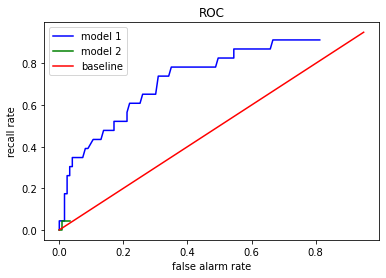

In [26]:
recall_rate_model_1 = np.array(recall_rate_model_1)
false_alarm_rate_model_1 = np.array(false_alarm_rate_model_1)
recall_rate_model_2 = np.array(recall_rate_model_2)
false_alarm_rate_model_2 = np.array(false_alarm_rate_model_2)
# print(len(recall_rate_model_2))
baseline = np.arange(0,1,0.05)
plt.plot(false_alarm_rate_model_1, recall_rate_model_1, color='b', label='model 1')
plt.plot(false_alarm_rate_model_2, recall_rate_model_2, color='g', label='model 2')
plt.plot(baseline, baseline, color='r', label='baseline')
plt.xlabel("false alarm rate")
plt.ylabel("recall rate")
plt.legend()
plt.title('ROC')
plt.show()

In [27]:
cols = [e for e in train_set3.columns if e != 'Attrition']
float_cols = [e for e in cols if train_set3[e].dtypes == 'float64']
for float_col in float_cols:
  bin_range = get_bin_range(train_set3, float_col, 5)
  train_set3[float_col] = bucketize(train_set3, float_col, bin_range)
  test_set3[float_col] = bucketize(test_set3, float_col, bin_range)

features = [e for e in list(train_set3.columns) if e != 'Attrition']
classes = [0, 1]
prob_feature_given_class = {}
for class_ in classes:
  for col in features:
    df_class = train_set3[train_set3['Attrition'] == class_]
    y = np.array(df_class[~np.isnan(df_class[col])][col])
    unique, counts = np.unique(y, return_counts=True)
    bucket_dict = dict(zip(unique, counts))
    number_element = sum(bucket_dict.values())
    normalize_bucket = {}
    for key, value in bucket_dict.items():
      normalize_bucket[key] = value / number_element
    # print(normalize_bucket)
    prob_feature_given_class[(f'class_{class_}', col)] = normalize_bucket

test_set_x, test_set_y = test_set3.drop(columns = "Attrition"), test_set3['Attrition']
test_result_prob = []
for index, row in test_set_x.iterrows():
  log_h_of_x = np.log(prob_leave) - np.log(prob_stay)
  for feature in features:
    if row[feature] == np.nan or str(row[feature]) == 'nan':
      continue
    key_leave = ('class_1', feature)
    leave_feature_dict = prob_feature_given_class[key_leave]
    p_feature_given_leave = leave_feature_dict[row[feature]] if row[feature] in leave_feature_dict else 1e-3
    key_stay = ('class_0', feature)
    stay_feature_dict = prob_feature_given_class[key_stay]
    p_feature_given_stay = stay_feature_dict[row[feature]] if row[feature] in stay_feature_dict else 1e-3
    log_h_of_x += (np.log(p_feature_given_leave) - np.log(p_feature_given_stay))
  test_result_prob.append(log_h_of_x)
test_result_prob = np.array(test_result_prob)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in long_scalars
  del sys.path[0]


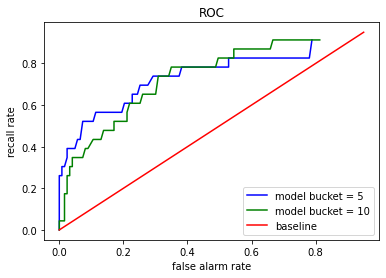

In [28]:
thresholds = np.arange(-5,5,0.05)
recall_rate_model = []
false_alarm_rate_model = []
for t in thresholds:
  test_result_pred = (test_result_prob > t) + 0
  N = len(test_set_y)
  # print(len(test_set_y))
  accuracy = (test_set_y == test_result_pred).sum() / N
  true_positive = ((test_set_y == 1) & (test_result_pred == 1)).sum()
  false_postive = ((test_set_y == 0) & (test_result_pred == 1)).sum()
  false_negative = ((test_set_y == 1) & (test_result_pred == 0)).sum()
  actual_no = (test_set_y == 0).sum()
  precision = true_positive / (true_positive + false_postive)
  recall = true_positive / (true_positive + false_negative)
  f1 = (2*precision*recall) / (precision + recall)
  false_alarm_rate = false_postive / actual_no
  max_acc_model_1 = max(max_acc_model_1, accuracy)
  max_f1_model_1 = max(max_f1_model_1, f1)
  recall_rate_model.append(recall)
  false_alarm_rate_model.append(false_alarm_rate)

recall_rate_model = np.array(recall_rate_model)
false_alarm_rate_model = np.array(false_alarm_rate_model)
# print(len(recall_rate_model_2))
baseline = np.arange(0,1,0.05)
plt.plot(false_alarm_rate_model, recall_rate_model, color='b', label='model bucket = 5')
plt.plot(false_alarm_rate_model_1, recall_rate_model_1, color='g', label='model bucket = 10')
plt.plot(baseline, baseline, color='r', label='baseline')
plt.xlabel("false alarm rate")
plt.ylabel("recall rate")
plt.legend()
plt.title('ROC')
plt.show()